El presente notebook tiene como objetivo el brindar aplicaciones de ejemplo de las ANN y sus variedades de modelos. Asi mismo cabe indicar que tienen base la documentacion y ejemplos de la pagina oficial "tensorflow.org"

# Librerias

In [7]:
## Conjunto de librerias a usar

### La idea aqui no es optimizar la cantidad de lineas, sino familiarizarse con las librerias a usar
### esto implica el importar cada una de las funciones de forma individual

# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus
#import xgboost
from kneed import KneeLocator
import joblib
import mglearn
from IPython.display import Image
import sklearn as skl
from IPython import display
import glob
import imageio
import os
import PIL
from tensorflow.keras import layers
import time
import scipy
import sys
from mpl_toolkits.mplot3d import Axes3D
import math
import pickle
from scipy import stats

# Clonar modelos creados
from sklearn.base import clone 


## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV


## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_california_housing


## Clasificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## librerias Regresion Lineal
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor ## Stochastic gradient descent (alternativa Mini-Batch)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


## IMPORTANTE: Libreria sklearn
import sklearn as skl ## importar la libreria de sklearn como skl


## SVM 
from sklearn.svm import LinearSVC # clasificacion
from sklearn.svm import LinearSVR # regresion
from sklearn.svm import SVC
from sklearn.svm import SVR


## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


# Ensemble methods
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor


# Reduction of Dimension
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA


# Unsupervised learning
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics.cluster import adjusted_rand_score


## Machine Learning - Deep Learning
import tensorflow as tf
from tensorflow import keras
from functools import partial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias

## fin

In [6]:
# ver version de tf y keras

print(tf.__version__)
print(keras.__version__)

# fin

2.6.0
2.6.0


# Autoencoder

### Modelo Opcion 01 de Autoencoder



Encoder: 
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
imagen_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_4 (Glob (None, 16)        

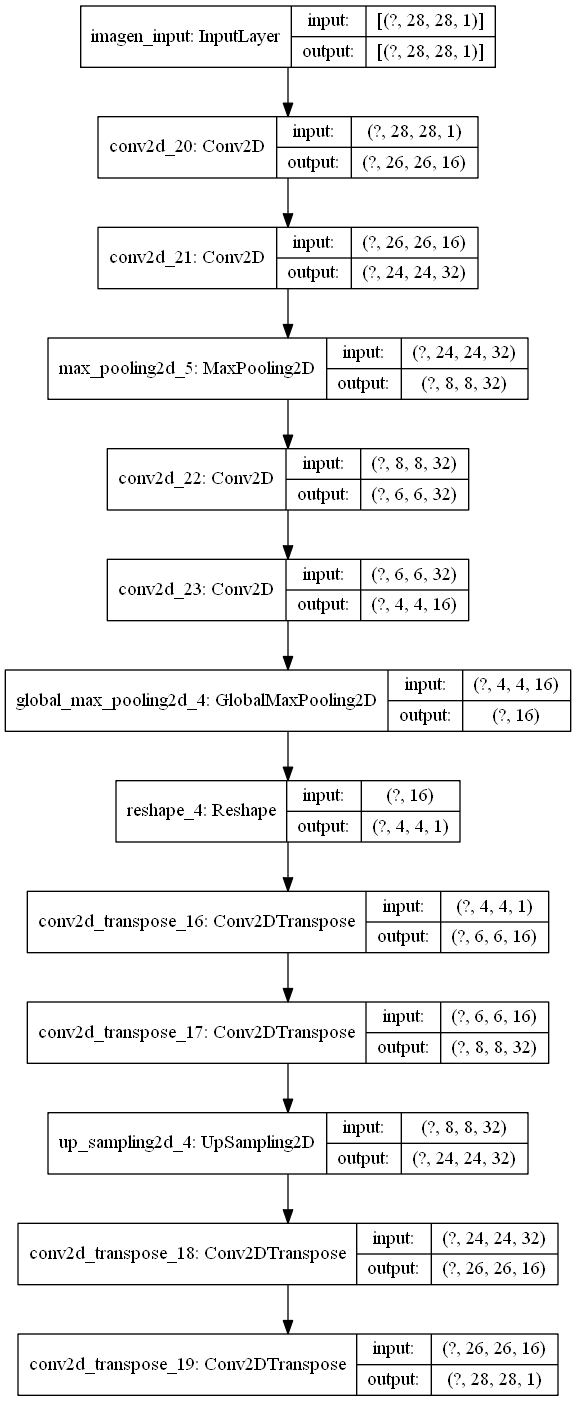

In [49]:
# modelo de autoencoder

# Encoder
print('\n\nEncoder: ')
encoder_input = keras.Input(shape=(28,28,1),name='imagen_input')
x = keras.layers.Conv2D(16,3,activation='relu')(encoder_input)
x = keras.layers.Conv2D(32,3,activation='relu')(x)
x = keras.layers.MaxPooling2D(3)(x)
x = keras.layers.Conv2D(32,3,activation='relu')(x)
x = keras.layers.Conv2D(16,3,activation='relu')(x)
encoder_output = keras.layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
print(encoder.summary()) # ver encoder

############################################################################

# Decoder 
print('\n\nAutoEncoder total:')
x = keras.layers.Reshape((4,4,1))(encoder_output)
x = keras.layers.Conv2DTranspose(16,3,activation='relu')(x)
x = keras.layers.Conv2DTranspose(32,3,activation='relu')(x)
x = keras.layers.UpSampling2D(3)(x)
x = keras.layers.Conv2DTranspose(16,3,activation='relu')(x)
decoder_output = keras.layers.Conv2DTranspose(1,3,activation = 'relu')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name = 'autoencoder')

print(autoencoder.summary()) # ver modelo completo
keras.utils.plot_model(autoencoder, 'modelo_autoencoder.png', show_shapes = True) # ver grafico de modelo
   
# fin

### Modelo Opcion 02 de Autoencoder ----- Recomendable usar este en vez de la Opcion 01



Encoder:
Model: "encoder_imagen"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_imagen (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_6 (Glob (None, 16)  

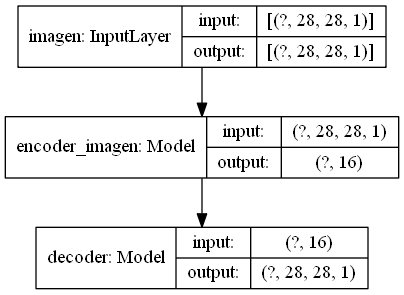

In [79]:
# Modelo de Autoencoder en 02 modelos separados

# Input-Encoder
print('\n\nEncoder:')
encoded_input = keras.Input(shape=(28,28,1), name='original_imagen')
x = keras.layers.Conv2D(16,3,activation='relu')(encoded_input)
x = keras.layers.Conv2D(32,3,activation='relu')(x)
x = keras.layers.MaxPooling2D(3)(x)
x = keras.layers.Conv2D(32,3,activation='relu')(x)
x = keras.layers.Conv2D(16,3,activation='relu')(x)
encoded_output = keras.layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoded_input, encoded_output, name='encoder_imagen') # modelo
print(encoder.summary()) # ver encoder


# Encoded - Output
print('\n\nDecoder:')
decoder_input = keras.Input(shape=(16,),name='encoded_imagen')
x = keras.layers.Reshape((4,4,1))(decoder_input)
x = keras.layers.Conv2DTranspose(16,3,activation='relu')(x)
x = keras.layers.Conv2DTranspose(32,3,activation='relu')(x)
x = keras.layers.UpSampling2D(3)(x)
x = keras.layers.Conv2DTranspose(16,3,activation='relu')(x)
decoder_output = keras.layers.Conv2DTranspose(1,3,activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name = 'decoder') # modelo
print(decoder.summary()) ## ver decoder


# Juntar Encoder - Decoder ---- se juntan los 02 modelos anteriores en uno solo compactado
print('\n\nAutoencoder:')
autoencoder_input = keras.Input(shape=(28,28,1), name = 'imagen')
encoded_img = encoder(autoencoder_input) # se usa modelo anterior con nueva entrada definida
decoded_img = decoder(encoded_img) # se usa modelo anterior con nueva capa  
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')

print(autoencoder.summary()) ## ver autoencoder
keras.utils.plot_model(autoencoder, 'modelo_autoencoder.png', show_shapes = True) # ver grafico de modelo
   
# fin


Train shape (X-y): 
(60000, 28, 28)
(60000,)

Test shape (X-y): 
(10000, 28, 28)
(10000,)

X valid shape:  (10000, 28, 28)
X train shape:  (50000, 28, 28)


Imagen aleatoria, valor seleccionado:  [2400]


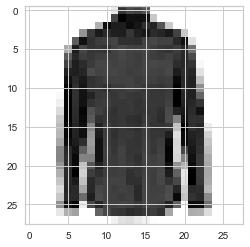

In [92]:
# Cargar datos de imagenes

datos=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=datos.load_data()

#X_train_full = np.rot90(X_train_full.T,3) # se cambia de shape (50000,28,28) a (28,28,50000)
#X_test = np.rot90(X_test.T,3) 

print('\nTrain shape (X-y): ')
print(X_train_full.shape)
print(y_train_full.shape)

print('\nTest shape (X-y): ')
print(X_test.shape)
print(y_test.shape)

########################################################################################33

# Normalizar datos a rango [0,1] ---- Es decir se normalizan datos
X_test = X_test/255.0 ## normalizar a rango [0,1]
X_train_full = X_train_full/255.0  ## normalizar a rango [0,1]

# Dividir datos de entrenamiento en grupos de train/validation
#X_valid, X_train = X_train_full[:,:,50000:], X_train_full[:,:,:50000]
#y_valid, y_train = y_train_full[5000:], y_train_full[:5000]
X_valid, X_train = X_train_full[50000:], X_train_full[:50000]
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]


########################################################################################33

# adicional - etiquetas
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print('\nX valid shape: ',X_valid.shape)
print('X train shape: ',X_train.shape)

########################################################################################33

# mostrar una observacion aleatoria
valor = np.random.randint(0,50000,1)
print('\n\nImagen aleatoria, valor seleccionado: ',valor)
plt.imshow(np.rot90(X_train.T,3)[:,:,valor])
plt.show() # mostrar

# fin

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
49728/50000 [============================>.] - ETA: 0s - loss: 0.0548
Epoch 00001: val_loss improved from inf to 0.03717, saving model to autoencoder_modelo.h5
50000/50000 [==============================] - 9s 174us/sample - loss: 0.0547 - val_loss: 0.0372
Epoch 2/150
49984/50000 [============================>.] - ETA: 0s - loss: 0.0341
Epoch 00002: val_loss improved from 0.03717 to 0.03312, saving model to autoencoder_modelo.h5
50000/50000 [==============================] - 7s 140us/sample - loss: 0.0341 - val_loss: 0.0331
Epoch 3/150
49984/50000 [============================>.] - ETA: 0s - loss: 0.0305
Epoch 00003: val_loss improved from 0.03312 to 0.02980, saving model to autoencoder_modelo.h5
50000/50000 [==============================] - 7s 140us/sample - loss: 0.0305 - val_loss: 0.0298
Epoch 4/150
49664/50000 [============================>.] - ETA: 0s - loss: 0.0282
Epoch 00004: val_loss improved from 0.02980 to 0.0272

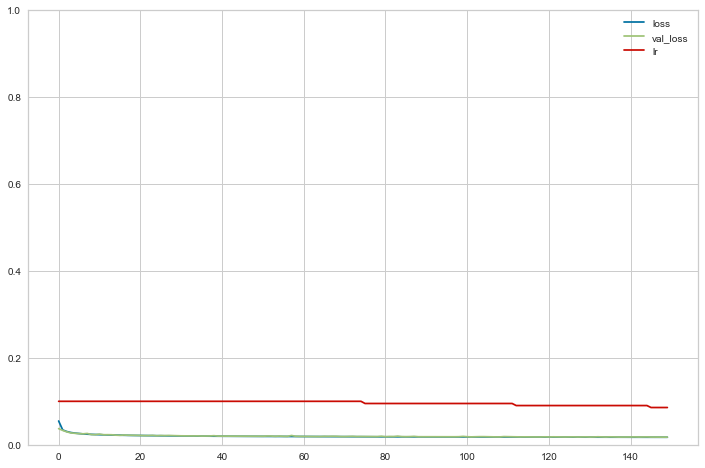

10000/10000 [==============================] - 1s 118us/sample - loss: 0.0176


MSE total:  0.017590064963698387


In [94]:
## Entrenar Modelo

# Indicar modelo a entrenar o usar
model = autoencoder

###############################################################################################

#model.compile(loss='mse',optimizer='sgd')
model.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9))

###############################################################################################

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'autoencoder_modelo.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=15,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

## Callabck de ajuste de learning rate (lr)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.95,patience=10,verbose=2)

###############################################################################################

# fit - ajuste de modelo
## NOTA: Como se trata de una imagen y segun definicion de la red neuronal, se agrega una dimension adicional con np.newaxis
history = model.fit(X_train[:,:,:,np.newaxis],X_train[:,:,:,np.newaxis],
                    epochs=150, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp,lrs], ## se indican callbacks checkpoint,parada y learning rate
                    validation_data=(X_valid[:,:,:,np.newaxis],X_valid[:,:,:,np.newaxis]))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

###############################################################################################

# Graficar historial de entrenamiento
print('\n\nResultados obtenidos:\n')
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento - mse
mse_total = model.evaluate(X_test[:,:,:,np.newaxis],X_test[:,:,:,np.newaxis])
print('\n\nMSE total: ',mse_total)

# fin

In [71]:
# Cargar Modelo entrenado

direccion = 'autoencoder_modelo.h5' # nombre de archivo a guardar modelo entrenado
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

# fin



Imagen aleatoria, valor seleccionado:  [991]


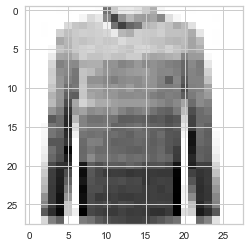



Imagen Predicha por el AutoEncoder


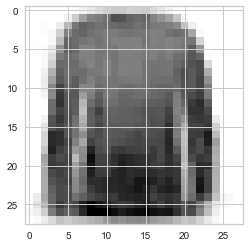

In [116]:
# Prediccion - Evaluacion de modelo de AutoEncoder

# Seleccion de una imagen aleatoria de testeo
valor = np.random.randint(0,1000,1)
print('\n\nImagen aleatoria, valor seleccionado: ',valor)
plt.imshow(np.rot90(X_test.T,3)[:,:,valor])
plt.show() # mostrar

# Predecir con el modelo entrenado
X_pred = model.predict(X_test[valor,:,:,np.newaxis]) 
X_pred = X_pred[:,:,:,0] # solo leer primeras 3 dimensiones
print('\n\nImagen Predicha por el AutoEncoder')
plt.imshow(np.rot90(X_pred.T,3))
plt.show() # mostrar

print('\n\n\n')

# fin

### Usar Capas de Encoder

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
imagen (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder_imagen (Model)       (None, 16)                18672     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________
None


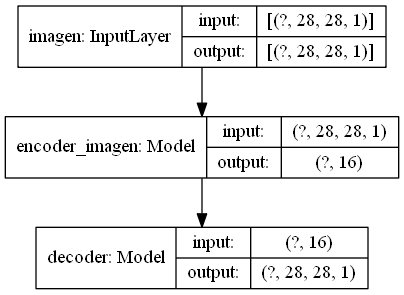

In [72]:
# ver modelo actual

print(model.summary()) ## ver autoencoder
keras.utils.plot_model(model, 'modelo_autoencoder.png', show_shapes = True) # ver grafico de modelo

# fin

### Definir capas a reusar de Encoder (Transfer Learning)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_imagen (Model)       (None, 16)                18672     
Total params: 18,672
Trainable params: 18,672
Non-trainable params: 0
_________________________________________________________________
None


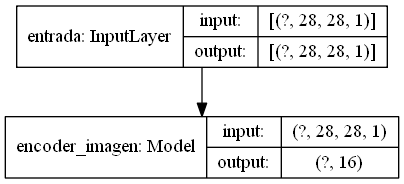

In [73]:
# reusar capas de encoder

model_encoder = keras.Sequential([
    keras.Input(shape=(28,28,1),name='entrada'),
    model.get_layer(name='encoder_imagen')
])

print(model_encoder.summary()) # ver modelo
keras.utils.plot_model(model_encoder, 'modelo_encoder.png', show_shapes = True) # ver grafico de modelo

# fin

### Prediccion Modelo Encoder



Imagen aleatoria, valor seleccionado:  [704]


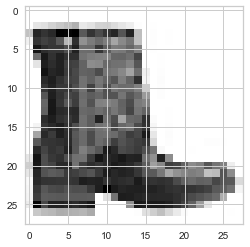



Vector Encoder (16):
[1.4763966  5.1325517  1.3299491  2.0383048  2.9099135  3.730232
 2.4741313  3.542971   1.461911   1.0630691  0.02880891 0.14601296
 4.2450447  5.740785   2.5867755  0.22994816]


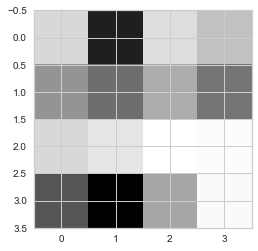

In [88]:
# Prediccion - Usando Modelo Encoder

# Seleccion de una imagen aleatoria de testeo
valor = np.random.randint(0,X_test.shape[0],1)
print('\n\nImagen aleatoria, valor seleccionado: ',valor)
plt.imshow(np.rot90(X_test.T,3)[:,:,valor])
plt.show() # mostrar

# Predecir con el modelo entrenado
y_pred = model_encoder.predict(X_test[valor,:,:,np.newaxis]) 

print('\n\nVector Encoder (16):')
for ii in y_pred:
    print(ii)

# Escalar valores para mostrar imagen
img = y_pred.copy()
img = (img - np.min(img))/(np.max(img)-np.min(img))
img = np.reshape(y_pred,(4,4)) # convertir a matriz 4x4

# mostrar Encoder (16 valores)
plt.imshow(img)
plt.show()
print('\n\n')
    
# fin


## Crear Modelo Ensamblado mediante capas Sequential



Ver modelo 1: 

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None



Ver Modelo Ensamblado: 

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
model_15 (Model)                (None, 1)            129 

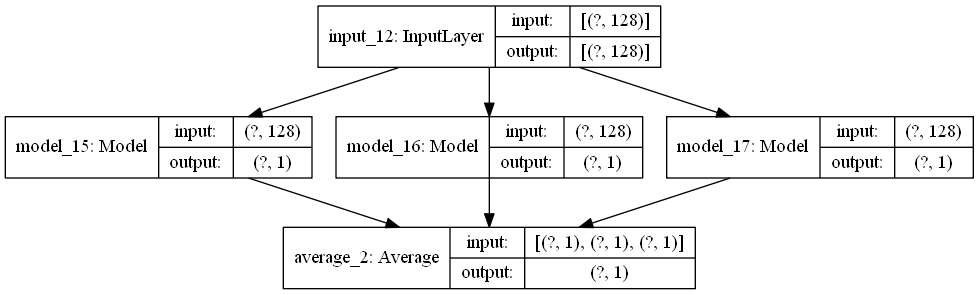

In [33]:
## Se creará un modelo ensamblado

def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = keras.layers.Dense(1, activation= 'sigmoid')(inputs)
    #print(keras.Model(inputs,outputs).summary()) # ver modelo definido en esta funcion 
    #keras.utils.plot_model(keras.Model(inputs,outputs),'funcion_get_model.png', show_shapes = True) # ver grafico de modelo
    return keras.Model(inputs,outputs)

modelo_1 = get_model()
modelo_2 = get_model()
modelo_3 = get_model()

# Ver uno de los modelos
print('\n\nVer modelo 1: \n')
print(modelo_1.summary()) # ver modelo definido en esta funcion 
keras.utils.plot_model(modelo_1,'funcion_get_model.png', show_shapes = True)

##############################################################################################

inputs = keras.Input(shape=(128,))
y1 = modelo_1(inputs)
y2 = modelo_2(inputs)
y3 = modelo_3(inputs)
outputs = keras.layers.average([y1,y2,y3]) ## capa de promedio de varias capas ... concatena en un solo valor

modelo_ensamblado = keras.Model(inputs = inputs, outputs = outputs)

print('\n\n\nVer Modelo Ensamblado: \n')
print(modelo_ensamblado.summary()) # ver modelo definido en esta funcion 
keras.utils.plot_model(modelo_ensamblado, 'modelo_ensamblado.png', show_shapes = True) # ver grafico de modelo
    

# fin

## Modelo con varias entradas - salidas



Ver modelo final:

Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     64000       title[0][0]                      
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 64)     64000       body[0][0]                       
______________________________________________________________________

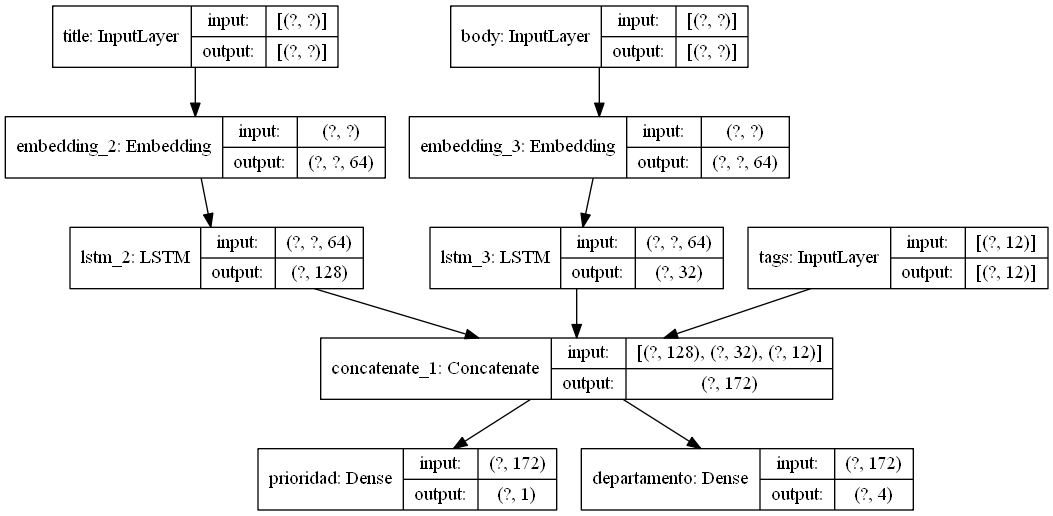

In [38]:
## Modelo hibrido

num_tags = 12
num_words = 1000
num_departments = 4

# Entradas
titulo = keras.Input(shape=(None,), name='title')
body = keras.Input(shape=(None,), name='body')
tags = keras.Input(shape=(num_tags,),name='tags')

# Capas Ocultas

# Pasar de vector de palabras a un vector embebido de dimension 64
title_features = keras.layers.Embedding(num_words,64)(titulo)
body_features = keras.layers.Embedding(num_words,64)(body)

# Reduccion de secuencia de palabras en un vecto de 127 y 32 respectivamente
title_features = keras.layers.LSTM(128)(title_features)
body_features = keras.layers.LSTM(32)(body_features)

# Combinar las capas
x = keras.layers.concatenate([title_features,body_features,tags])

# Salida 01
prioridad = keras.layers.Dense(1,activation='sigmoid',name='prioridad')(x)

# Salida 02
departamento = keras.layers.Dense(num_departments,activation='softmax', name='departamento')(x)

## Modelo resultante
model = keras.Model(inputs=[titulo,body,tags],outputs=[prioridad,departamento])

# Visualizar
print('\n\nVer modelo final:\n')
print(model.summary()) # ver modelo definido en esta funcion 
keras.utils.plot_model(model, 'modelo_final.png', show_shapes = True) # ver grafico de modelo


# fin

Train on 1024 samples, validate on 256 samples
Epoch 1/100
 896/1024 [=========================>....] - ETA: 0s - loss: 1.2586 - prioridad_loss: 0.6993 - departamento_loss: 2.7964
Epoch 00001: val_loss improved from inf to 1.28490, saving model to modelo_nuevo.h5
1024/1024 [==============================] - 4s 3ms/sample - loss: 1.2514 - prioridad_loss: 0.6988 - departamento_loss: 2.7627 - val_loss: 1.2849 - val_prioridad_loss: 0.7126 - val_departamento_loss: 2.8617
Epoch 2/100
 928/1024 [==========================>...] - ETA: 0s - loss: 1.2533 - prioridad_loss: 0.6991 - departamento_loss: 2.7707
Epoch 00002: val_loss improved from 1.28490 to 1.26819, saving model to modelo_nuevo.h5
1024/1024 [==============================] - 0s 327us/sample - loss: 1.2528 - prioridad_loss: 0.6997 - departamento_loss: 2.7655 - val_loss: 1.2682 - val_prioridad_loss: 0.6989 - val_departamento_loss: 2.8462
Epoch 3/100
 928/1024 [==========================>...] - ETA: 0s - loss: 1.2454 - prioridad_loss: 0

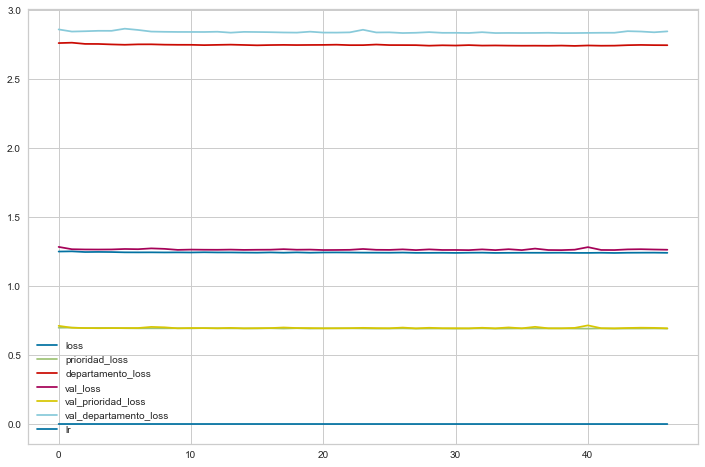

In [48]:
# datos-entrenar-validar modelo 

## Crear datos ficticios

title_data = np.random.randint(num_words,size=(1280,10))
body_data = np.random.randint(num_words,size=(1280,100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')

# Datos ficticios
prioridad_target = np.random.random(size=(1280,1))
departamento_target = np.random.randint(2, size=(1280, num_departments))

#############################################################################################

# definir parametros para el modelo
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss={'prioridad':'binary_crossentropy',
                  'departamento':'categorical_crossentropy'},
             loss_weights=[1.,0.2])

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'modelo_nuevo.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=15,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

## Callabck de ajuste de learning rate (lr)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.95,patience=5,verbose=2)

history =  model.fit({'title':title_data, 'body': body_data, 'tags':tags_data},
         {'prioridad':prioridad_target,'departamento':departamento_target},
         epochs=100,
         callbacks=[chk,lrs,stp],
         shuffle=True, # mezclar las observaciones aleatoriamente
         validation_split=0.2)

##############################################################################################

## Graficar historial de entrenamiento
print('\n\nFin de Fit:\n')
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
#plt.gca().set_ylim(0, 1) ## colocar entre el rango [0-1] 
plt.show()

# fin

# CNN Residual (Res-Net)

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_73 (Conv2D)              (None, 26, 26, 32)   320         img[0][0]                        
__________________________________________________________________________________________________
conv2d_74 (Conv2D)              (None, 24, 24, 64)   18496       conv2d_73[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 8, 8, 64)     0           conv2d_74[0][0]                  
_____________________________________________________________________________________________

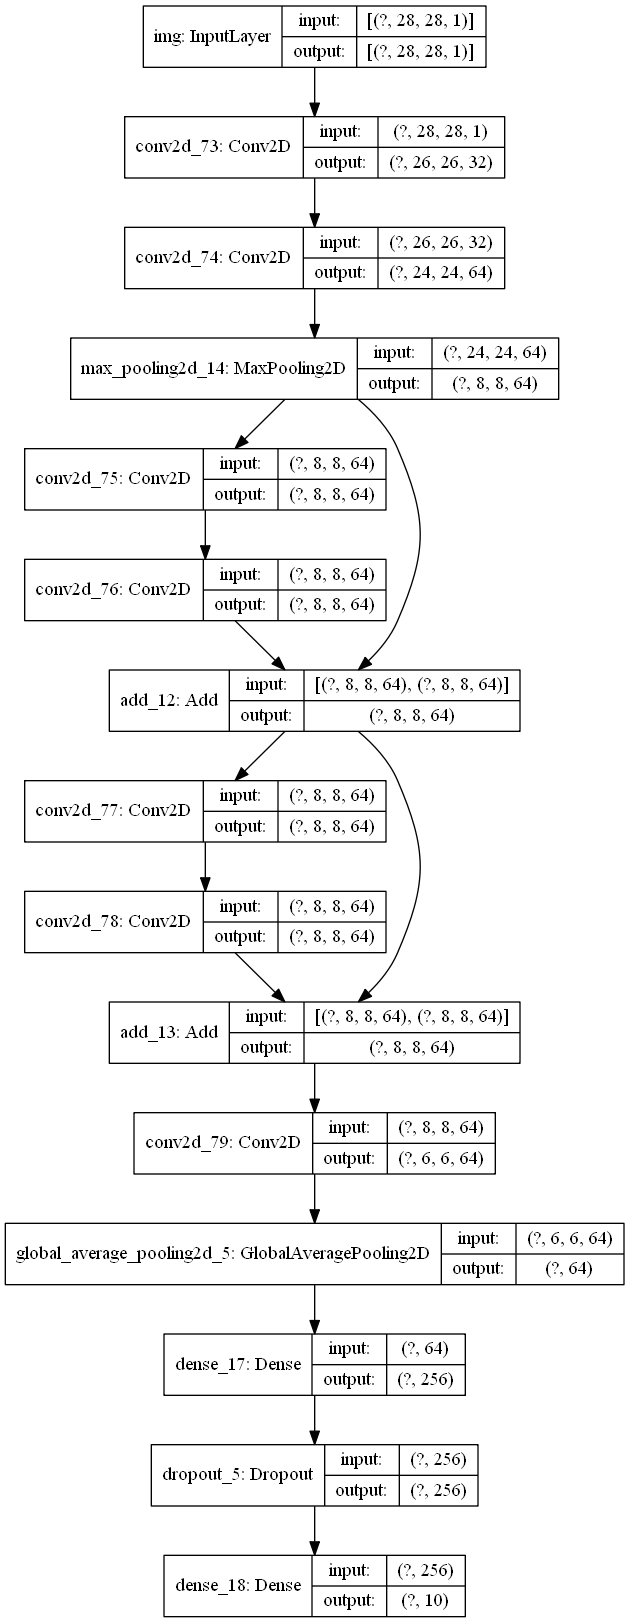

In [125]:
# modelo ResNet

# IMPORTANTE : Los datos (datsets) para entrenar el modelo se cargan posterior a este bloque

##########################################################################
################ Definicion de Modelo ResNet #############################

inputs = keras.Input(shape=(28,28,1),name='img')
x = keras.layers.Conv2D(32,3,activation = 'relu')(inputs)
x = keras.layers.Conv2D(64,3,activation = 'relu')(x)
block1 = keras.layers.MaxPooling2D(3)(x)

x = keras.layers.Conv2D(64,3,activation='relu', padding = 'same')(block1)
x = keras.layers.Conv2D(64,3,activation='relu', padding='same')(x)
block2 = keras.layers.add([x,block1])

x = keras.layers.Conv2D(64,3,activation='relu', padding='same')(block2)
x = keras.layers.Conv2D(64,3,activation ='relu', padding='same')(x)
block3 = keras.layers.add([x,block2])

x = keras.layers.Conv2D(64,3,activation='relu')(block3)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256,activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10,activation='softmax')(x) # 10 salidas de clasificacion

model = keras.Model(inputs,outputs, name='resnet')
print(model.summary()) # ver modelo
keras.utils.plot_model(model, 'modelo_final.png', show_shapes = True) # ver grafico de modelo

# fin


Train shape (X-y): 
(60000, 28, 28)
(60000,)

Test shape (X-y): 
(10000, 28, 28)
(10000,)

X valid shape:  (10000, 28, 28)
X train shape:  (50000, 28, 28)


Imagen aleatoria, valor seleccionado:  [38016]
Clasificacion de etiqueta:  [2]


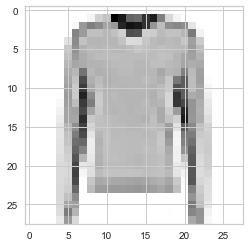

In [27]:
# Cargar datos de imagenes

datos=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=datos.load_data()

#X_train_full = np.rot90(X_train_full.T,3) # se cambia de shape (50000,28,28) a (28,28,50000)
#X_test = np.rot90(X_test.T,3) 

print('\nTrain shape (X-y): ')
print(X_train_full.shape)
print(y_train_full.shape)

print('\nTest shape (X-y): ')
print(X_test.shape)
print(y_test.shape)

########################################################################################33

# Normalizar datos a rango [0,1] ---- Es decir se normalizan datos
X_test = X_test.astype('float32')/255.0 ## normalizar a rango [0,1]
X_train_full = X_train_full.astype('float32')/255.0  ## normalizar a rango [0,1]

# Dividir datos de entrenamiento en grupos de train/validation
#X_valid, X_train = X_train_full[:,:,50000:], X_train_full[:,:,:50000]
#y_valid, y_train = y_train_full[50000:], y_train_full[:05000]
X_valid, X_train = X_train_full[50000:], X_train_full[:50000]
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]


########################################################################################33

# adicional - etiquetas
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print('\nX valid shape: ',X_valid.shape)
print('X train shape: ',X_train.shape)

########################################################################################33

# mostrar una observacion aleatoria
valor = np.random.randint(0,50000,1)
print('\n\nImagen aleatoria, valor seleccionado: ',valor)
print('Clasificacion de etiqueta: ', y_train[valor])
plt.imshow(np.rot90(X_train.T,3)[:,:,valor])
plt.show() # mostrar

# fin

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
49984/50000 [============================>.] - ETA: 0s - loss: 0.8628 - accuracy: 0.6747
Epoch 00001: val_loss improved from inf to 0.53986, saving model to resnet_modelo.h5
50000/50000 [==============================] - 11s 223us/sample - loss: 0.8627 - accuracy: 0.6748 - val_loss: 0.5399 - val_accuracy: 0.7919
Epoch 2/150
49920/50000 [============================>.] - ETA: 0s - loss: 0.4433 - accuracy: 0.8404
Epoch 00002: val_loss did not improve from 0.53986
50000/50000 [==============================] - 10s 196us/sample - loss: 0.4431 - accuracy: 0.8405 - val_loss: 0.6238 - val_accuracy: 0.7872
Epoch 3/150
49984/50000 [============================>.] - ETA: 0s - loss: 0.3516 - accuracy: 0.8754
Epoch 00003: val_loss improved from 0.53986 to 0.39854, saving model to resnet_modelo.h5
50000/50000 [==============================] - 10s 197us/sample - loss: 0.3516 - accuracy: 0.8754 - val_loss: 0.3985 - val_accuracy: 0.8536
Ep

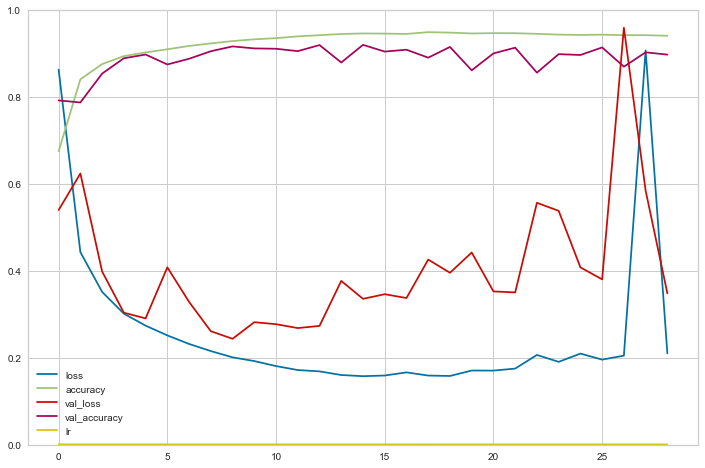

10000/10000 [==============================] - 1s 122us/sample - loss: 0.2676 - accuracy: 0.9119


MSE total:  [0.267591493499279, 0.9119]


In [131]:
## Entrenar Modelo

model.compile(loss='sparse_categorical_crossentropy',
              optimizer = keras.optimizers.RMSprop(1e-3),
              metrics=['accuracy'])

###############################################################################################

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'resnet_modelo.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

## Callabck de ajuste de learning rate (lr)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.95,patience=8,verbose=2)

###############################################################################################

# fit - ajuste de modelo
## NOTA: Como se trata de una imagen y segun definicion de la red neuronal, se agrega una dimension adicional con np.newaxis
history = model.fit(X_train[:,:,:,np.newaxis],y_train,
                    epochs=150, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp,lrs], ## se indican callbacks checkpoint,parada y learning rate
                    validation_data=(X_valid[:,:,:,np.newaxis],y_valid))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

###############################################################################################

# Graficar historial de entrenamiento
print('\n\nResultados obtenidos:\n')
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento - mse
rtotal = model.evaluate(X_test[:,:,:,np.newaxis],y_test)
print('\n\nResultados total: ',rtotal)

# fin

In [2]:
# Cargar Modelo entrenado

direccion = 'resnet_modelo.h5' # nombre de archivo a guardar modelo entrenado
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

# fin



Imagen aleatoria, valor seleccionado:  [9992]


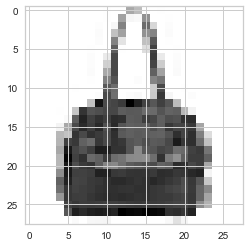



Clasificacion del modelo ResNet:  8
Clasificacion de etiqueta real:  8




In [175]:
# Prediccion - Evaluacion de modelo ResNet

# Seleccion de una imagen aleatoria de testeo
valor = np.random.randint(0,X_test.shape[0],1)
print('\n\nImagen aleatoria, valor seleccionado: ',valor)
plt.imshow(np.rot90(X_test.T,3)[:,:,valor])
plt.show() # mostrar

# Predecir con el modelo entrenado
y_pred = model.predict(X_test[valor,:,:,np.newaxis]) 
print('\n\nClasificacion del modelo ResNet: ',np.argmax(y_pred))
print('Clasificacion de etiqueta real: ', y_test[valor][0])
#print('\n\nVector de probabilidades obtenido:\n', y_pred,5)
print('\n')

# fin

## Clonar Modelo (Capas y Pesos) - (Bloque Auxiliar)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


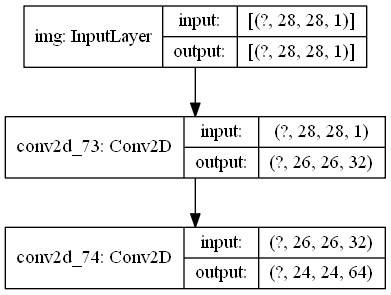

In [234]:
# Clonacion de Modelo entrenado

# 1) Clonar modelo 
model_a = keras.models.clone_model(model) 

# 2) copiar o transferir pesos de modelo entrenado
model_a.set_weights(model.get_weights()) 

# 3) crear modelo con seleccion de capas
model_b = keras.models.Sequential(
    model_a.layers[:3] 
) 

# 4) Ver modelo con capas seleccionadas 
model_b.summary()
keras.utils.plot_model(model_b, 'modelo_auxiliar.png', show_shapes = True) # ver grafico de modelo

# Agregar capas nuevas
## model_b.add(keras.layers.Dense(1,name='outb'))

# fin

# Transfer Learning - Aplicacion

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 64)                0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               6500      
_________________________________________________________________
dense2 (Dense)               (None, 60)                6060      
_________________________________________________________________
dense3 (Dense)               (None, 40)                2440      
_________________________________________________________________
out (Dense)                  (None, 10)               

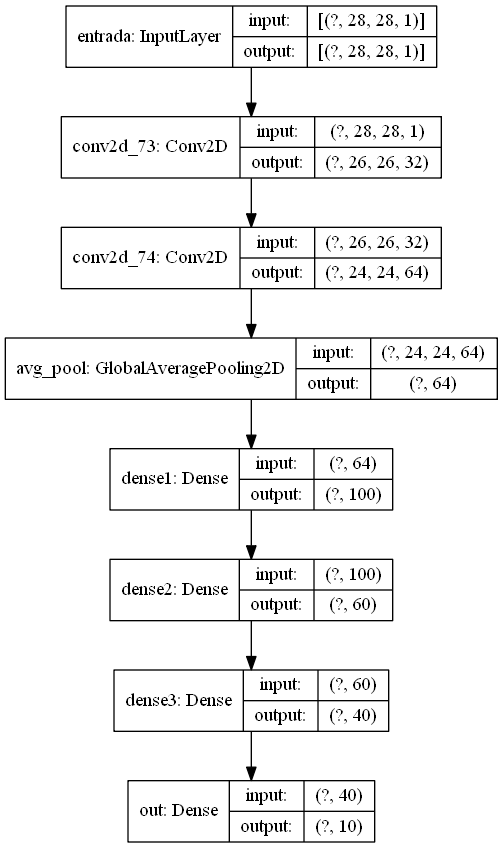

In [16]:
# reusar capas ya entrenadas de modelo "model"

## NOTA: model fue sacado del modelo ResNet anterior .....

model_aux = keras.Sequential([
    keras.Input(shape=(28,28,1),name='entrada'),
    model.get_layer(name='conv2d_73'),
    model.get_layer(name='conv2d_74'),
    keras.layers.GlobalAveragePooling2D(name='avg_pool'),      ## capa nueva agregada
    keras.layers.Dense(100,activation='tanh',name='dense1'),   ## capa nueva agregada
    keras.layers.Dense(60,activation='tanh',name='dense2'),    ## capa nueva agregada
    keras.layers.Dense(40,activation='sigmoid',name='dense3'), ## capa nueva agregada
    keras.layers.Dense(10,activation='softmax',name='out'),    ## capa nueva agregada
])

print(model_aux.summary())
keras.utils.plot_model(model_aux, 'modelo_auxiliar_otro.png', show_shapes = True) # ver grafico de modelo

#for layer in model.layers[:-1]:
#    layer.trainable = False  ## se congela la capa para no actualizar valores cuando se entrene el modelo   

# fin


Train shape (X-y): 
(60000, 28, 28)
(60000,)

Test shape (X-y): 
(10000, 28, 28)
(10000,)

X valid shape:  (10000, 28, 28)
X train shape:  (50000, 28, 28)


Imagen aleatoria, valor seleccionado:  [47223]


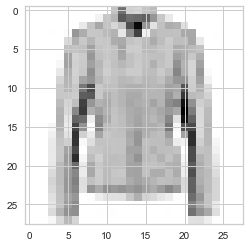

In [17]:
# Cargar datos de imagenes

datos=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=datos.load_data()

#X_train_full = np.rot90(X_train_full.T,3) # se cambia de shape (50000,28,28) a (28,28,50000)
#X_test = np.rot90(X_test.T,3) 

print('\nTrain shape (X-y): ')
print(X_train_full.shape)
print(y_train_full.shape)

print('\nTest shape (X-y): ')
print(X_test.shape)
print(y_test.shape)

########################################################################################33

# Normalizar datos a rango [0,1] ---- Es decir se normalizan datos
X_test = X_test/255.0 ## normalizar a rango [0,1]
X_train_full = X_train_full/255.0  ## normalizar a rango [0,1]

# Dividir datos de entrenamiento en grupos de train/validation
#X_valid, X_train = X_train_full[:,:,50000:], X_train_full[:,:,:50000]
#y_valid, y_train = y_train_full[5000:], y_train_full[:5000]
X_valid, X_train = X_train_full[50000:], X_train_full[:50000]
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]


########################################################################################33

# adicional - etiquetas
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print('\nX valid shape: ',X_valid.shape)
print('X train shape: ',X_train.shape)

########################################################################################33

# mostrar una observacion aleatoria
valor = np.random.randint(0,50000,1)
print('\n\nImagen aleatoria, valor seleccionado: ',valor)
plt.imshow(np.rot90(X_train.T,3)[:,:,valor])
plt.show() # mostrar

# fin



Imagen aleatoria, valor seleccionado:  [3650]


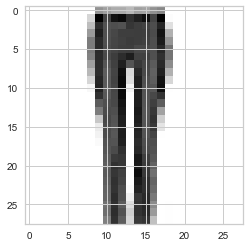

array([[0.08942499, 0.14366189, 0.11530332, 0.10312645, 0.07129277,
        0.07331818, 0.10333921, 0.05535896, 0.09499909, 0.1501752 ]],
      dtype=float32)

In [18]:
# Prediccion - Usando Modelo Auxiliar definido - Modelo SIN ENTRENAR CAPAS NUEVAS AGREGADAS ---- (Solo para probar)

# Seleccion de una imagen aleatoria de testeo
valor = np.random.randint(0,X_test.shape[0],1)
print('\n\nImagen aleatoria, valor seleccionado: ',valor)
plt.imshow(np.rot90(X_test.T,3)[:,:,valor])
plt.show() # mostrar

# Predecir con el modelo entrenado
y_pred = model_aux.predict(X_test[valor,:,:,np.newaxis]) 

y_pred # ver prediccion

# fin

## Congelar - Descongelar capas de modelo

In [19]:
# Congelar capas especificas del modelo

nombres = ['conv2d_73','conv2d_74']

## Congelar capas
for aa in nombres:
    model_aux.get_layer(name=aa).trainable = False  ## congelar capas

#for layer in model_aux.layers[:2]:
#    layer.trainable = False ## las primeras capas (layer[0],layer[1]) no son entrenables 

## Descongelar capas congeladas
#for aa in nombres:
#    model_aux.get_layer(name=aa).trainable = True  ## descongelar capas

model_aux.summary()

# end

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 64)                0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               6500      
_________________________________________________________________
dense2 (Dense)               (None, 60)                6060      
_________________________________________________________________
dense3 (Dense)               (None, 40)                2440      
_________________________________________________________________
out (Dense)                  (None, 10)               



Entrenar capas NO CONGELADAS del modelo creado
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
49536/50000 [============================>.] - ETA: 0s - loss: 1.4289 - accuracy: 0.4599
Epoch 00001: val_loss improved from inf to 1.02062, saving model to modelo_creado_auxiliar.h5
50000/50000 [==============================] - 5s 99us/sample - loss: 1.4255 - accuracy: 0.4612 - val_loss: 1.0206 - val_accuracy: 0.5846
Epoch 2/50
49728/50000 [============================>.] - ETA: 0s - loss: 0.9582 - accuracy: 0.6011 ETA: 
Epoch 00002: val_loss improved from 1.02062 to 0.92899, saving model to modelo_creado_auxiliar.h5
50000/50000 [==============================] - 4s 86us/sample - loss: 0.9578 - accuracy: 0.6014 - val_loss: 0.9290 - val_accuracy: 0.6065
Epoch 3/50
49920/50000 [============================>.] - ETA: 0s - loss: 0.9012 - accuracy: 0.6176 E
Epoch 00003: val_loss improved from 0.92899 to 0.90758, saving model to modelo_creado_auxiliar.h5
50000/50000 [==============

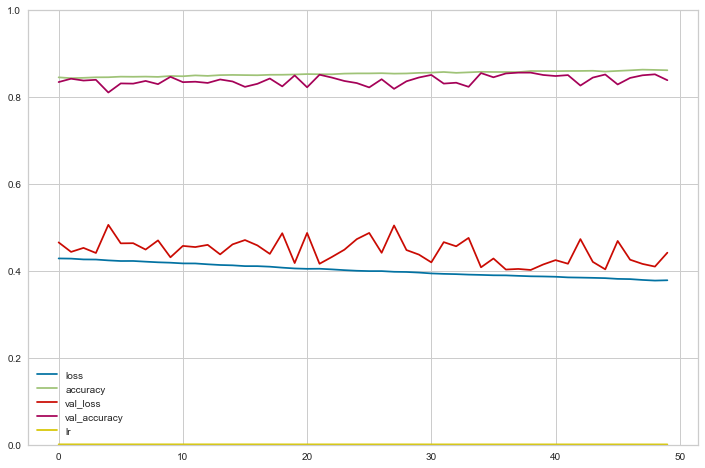

10000/10000 [==============================] - 1s 100us/sample - loss: 0.4150 - accuracy: 0.8514 - loss:


Resultados total:  [0.4150014715194702, 0.8514]


In [20]:
## Entrenar Modelo

model = model_aux # se indica cual es el modelo a utilizarse para el presente bloque

###############################################################################################

model.compile(loss='sparse_categorical_crossentropy',
              optimizer = keras.optimizers.RMSprop(1e-3),
              metrics=['accuracy'])

###############################################################################################

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'modelo_creado_auxiliar.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

## Callabck de ajuste de learning rate (lr)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.95,patience=8,verbose=2)

###############################################################################################

## Entrenar capas NO CONGELADAS del modelo creado

## NOTA: Como se trata de una imagen y segun definicion de la red neuronal, se agrega una dimension adicional con np.newaxis
print('\n\nEntrenar capas NO CONGELADAS del modelo creado')
history = model.fit(X_train[:,:,:,np.newaxis],y_train,
                    epochs=50, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    batch_size = 64,
                    callbacks=[chk,stp,lrs], ## se indican callbacks checkpoint,parada y learning rate
                    validation_data=(X_valid[:,:,:,np.newaxis],y_valid))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

###############################################################################################

## Descongelar Todas las capas del modelo
for layer in model.layers:
    layer.trainable = True ## se descongelan todas las capas

###############################################################################################

## Entrenar capas Todas las capas

## NOTA: Como se trata de una imagen y segun definicion de la red neuronal, se agrega una dimension adicional con np.newaxis
print('\n\nEntrenar capas NO CONGELADAS del modelo creado')
history = model.fit(X_train[:,:,:,np.newaxis],y_train,
                    epochs=50, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp,lrs], ## se indican callbacks checkpoint,parada y learning rate
                    validation_data=(X_valid[:,:,:,np.newaxis],y_valid))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

###############################################################################################

# Graficar historial de entrenamiento
print('\n\nResultados obtenidos:\n')
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento - mse
rtotal = model.evaluate(X_test[:,:,:,np.newaxis],y_test)
print('\n\nResultados total: ',rtotal)

# fin

In [21]:
# Cargar Modelo entrenado

direccion = 'modelo_creado_auxiliar.h5' # nombre de archivo a guardar modelo entrenado
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

# fin



Imagen aleatoria, valor seleccionado:  [5302]


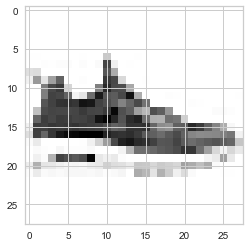



Clasificacion del modelo:  7
Clasificacion de etiqueta real:  7




In [25]:
# Prediccion - Evaluacion de modelo creado

# Seleccion de una imagen aleatoria de testeo
valor = np.random.randint(0,X_test.shape[0],1)
print('\n\nImagen aleatoria, valor seleccionado: ',valor)
plt.imshow(np.rot90(X_test.T,3)[:,:,valor])
plt.show() # mostrar

# Predecir con el modelo entrenado
y_pred = model.predict(X_test[valor,:,:,np.newaxis]) 
print('\n\nClasificacion del modelo: ',np.argmax(y_pred))
print('Clasificacion de etiqueta real: ', y_test[valor][0])
#print('\n\nVector de probabilidades obtenido:\n', y_pred,5)
print('\n')

# fin

# CNN

Los siguientes ejemplos fueron sacados de: 
https://www.tensorflow.org/tutorials/images/cnn

In [17]:
# cargar datos

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# normalizar 
train_images, test_images = train_images / 255.0, test_images / 255.0

print('\nDimension imagenes train: ',train_images.shape)
print('Dimension etiquetas train: ',train_labels.shape)
print('-----------------------')
print('Dimension imagenes test: ',test_images.shape)
print('Dimension etiquetas test: ',test_labels.shape)
print('-----------------------')
print('Cantidad de etiquetas: ',len(np.unique(train_labels)))
print('\n\n')

# fin


Dimension imagenes train:  (50000, 32, 32, 3)
Dimension etiquetas train:  (50000, 1)
-----------------------
Dimension imagenes test:  (10000, 32, 32, 3)
Dimension etiquetas test:  (10000, 1)
-----------------------
Cantidad de etiquetas:  10





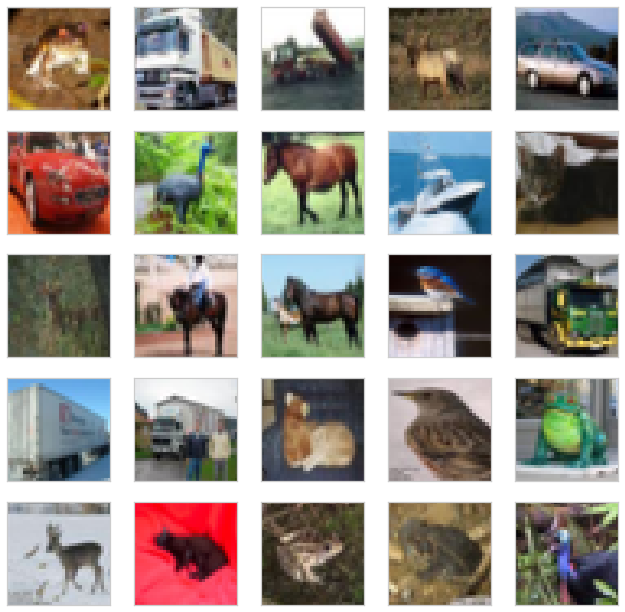

In [7]:
# ver datos

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(11,11))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

# fin



Modelo Parcial Convolucional:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


Modelo Completo:
Model: "sequential_2"
______________________________________

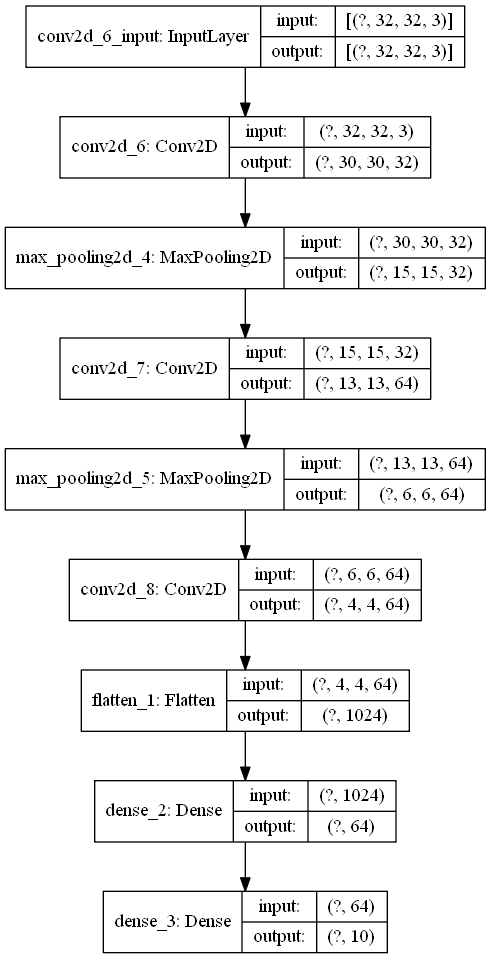

In [19]:
# Modelo 

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))

print('\n\nModelo Parcial Convolucional:')
print(model.summary())
keras.utils.plot_model(model, 'modelo_cnn_ejemplo.png', show_shapes = True) # ver grafico de modelo

## Agregar capas densas
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10))

print('\n\nModelo Completo:')
print(model.summary())
keras.utils.plot_model(model, 'modelo_cnn_ejemplo.png', show_shapes = True) # ver grafico de modelo

# fin

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
49856/50000 [============================>.] - ETA: 0s - loss: 0.6704 - accuracy: 0.7668
Epoch 00001: val_loss improved from inf to 0.86748, saving model to best_cnn_ejemplo.h5
50000/50000 [==============================] - 9s 170us/sample - loss: 0.6701 - accuracy: 0.7668 - val_loss: 0.8675 - val_accuracy: 0.6998
Epoch 2/100
49696/50000 [============================>.] - ETA: 0s - loss: 0.6341 - accuracy: 0.7780
Epoch 00002: val_loss did not improve from 0.86748
50000/50000 [==============================] - 8s 159us/sample - loss: 0.6341 - accuracy: 0.7779 - val_loss: 0.8758 - val_accuracy: 0.7060
Epoch 3/100
49952/50000 [============================>.] - ETA: 0s - loss: 0.6037 - accuracy: 0.7886
Epoch 00003: val_loss improved from 0.86748 to 0.85978, saving model to best_cnn_ejemplo.h5
50000/50000 [==============================] - 8s 161us/sample - loss: 0.6036 - accuracy: 0.7886 - val_loss: 0.8598 - val_accuracy: 0.7151

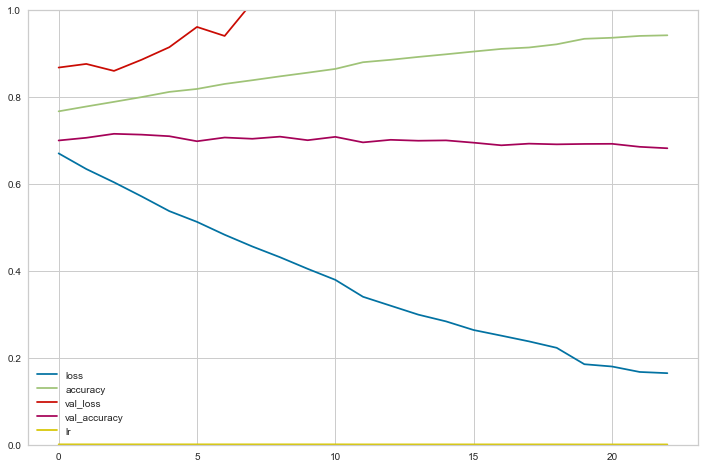

10000/10000 - 1s - loss: 0.8598 - accuracy: 0.7151


Test Loss:  0.8597796138763427
Test Accu:  0.7151





In [22]:
# compile - Train and Evaluate

#model.compile(loss='mse',optimizer='sgd')
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'Adam',
              metrics = ['accuracy'])

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'best_cnn_ejemplo.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

## Callabck de ajuste de learning rate (lr)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=8,verbose=2)


#########################################

# fit - ajuste de modelo
history = model.fit(train_images,train_labels,
                    epochs=100, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    #batch_size = 64, # dimension de bloques de datos a pasar (batch de datos)
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp,lrs], ## se indican callbacks checkpoint,parada y learning rate
                    validation_data=(test_images,test_labels))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

#######################################

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


# test de rendimiento
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n\nTest Loss: ',test_loss)
print('Test Accu: ',test_acc)
print('\n\n')

# fin

In [60]:
# Inicializar variables de experimento o medicion del modelo

# Se aplicarán en el siguiente bloque de codigo

aciertos = 0 ## contará cuantas veces acierta
aciertos_10 = list(np.zeros(10)) # lista con 10 salidas

total = 0 ## contará cuantas veces en total 
total_10 = list((np.zeros(10))) # lista con 10 salidas para contar total por cada salida

precision = None # precision global
precision_10 = None # precision por cada salida

# fin



Imagen aleatoria, valor seleccionado:  7801


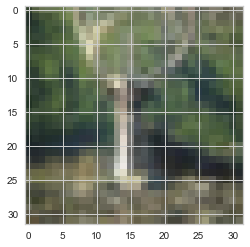



Vector predicho (10 salidas):  [[ 0.1 -4.5  3.2  2.2  1.8  1.5 -0.3 -1.9 -1.5 -2.2]]


Debemos esperar aprox un acierto del:  71.51 %
Clasificacion del modelo:  2
Clasificacion de etiqueta real:  4


Precision global:  65.62 %
Precision por salida:  [0.0, 0.0, 60.0, 50.0, 66.67, 100.0, 75.0, 50.0, 100.0, 66.67]





In [93]:
# Prediccion - Evaluacion de modelo creado

# Seleccion de una imagen aleatoria de testeo
valor = np.random.randint(0,test_images.shape[0],1)
valor=valor[0]
print('\n\nImagen aleatoria, valor seleccionado: ',valor)
plt.imshow(test_images[valor])
plt.show() # mostrar

# Predecir con el modelo entrenado
imagen = test_images[valor]

# NOTA: Cuando se pasa solo 01 imagen para predecir con el modelo, se debe agregar una
# dimension adicional, ya que el modelo fue entrenado con tensores de m*32*32*3
# por lo que esperará que se le pase 1*32*32*3 ... la imagen es de solo 32*32*3 falta el "1" inicial
y_pred = model.predict(imagen[np.newaxis]) 


print('\n\nVector predicho (10 salidas): ',np.round(y_pred,1))
print('\n\nDebemos esperar aprox un acierto del: ',np.round(test_acc*100.0,2),'%') # del entrenamiento anterior del modelo
print('Clasificacion del modelo: ',np.argmax(y_pred))
print('Clasificacion de etiqueta real: ', test_labels[valor][0]) ## se podria leer solo "test_labels[valor]", sin agregar el [0]
print('\n')

total += 1 ## se aumenta en 01 el total de experimentos de testeo 
total_10[(test_labels[valor][0]-1)] +=1  ## se aumenta en 01 a la salida que le corresponde el dato

aciertos += (1 if (np.argmax(y_pred)==test_labels[valor][0]) else 0)
aciertos_10[(test_labels[valor][0]-1)] += (1 if (np.argmax(y_pred)==test_labels[valor][0]) else 0) 

# Medida de precision
precision = round(100.0*aciertos/total,2)
precision_10 = [round(100.0*i/(j+1e-10),2) for i, j in zip(aciertos_10,total_10)] 

print('Precision global: ',precision,'%')
print('Precision por salida: ',precision_10)
print('\n\n')

# Comentario: Se espera que a la larga se convergan a los valores calculados en el entrenamiento
# esto gracias a la Teorema del Limite Central ... convergencia al esperado en el infinito

# fin

#  AutoEncoder - Aplicacion

In [43]:
# cargar datos

(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print('\nDimension imagenes train: ',x_train.shape)
print('-----------------------')
print('Dimension imagenes test: ',x_test.shape)
print('\n\n')

# fin


Dimension imagenes train:  (60000, 28, 28)
-----------------------
Dimension imagenes test:  (10000, 28, 28)





In [44]:
# definir class Autoencoder

# Aqui heredamos las propiedades de la clase "keras.Model" como base de la clase hij@

# dim_encoder indica las dimensiones de la capa oculta de codificacion/reduccion de dimension
# por lo que aqui se indica cual es el vector de codificacion de la imagen

# Modelo sencillo basado en:
# 1) Entrada imagen (28,28)
# 2) Flatten.. vector columna
# 3) Capa Densa encoder .. dimension : "dim_encoder" (Capa codificada/reductora de dimension)
# 4) Capa densa decodificaro de dimension 784
# 5) Capa de reshape a (28,28) .. es decir, transformar a imagen nuevamente, igual a input.shape


class Autoencoder(keras.Model):
    def __init__(self, dim_encoder):
        super(Autoencoder,self).__init__()
        self.dim_encoder = dim_encoder
        
        # Definir input-encoded layer
        self.encoder = keras.Sequential([
            keras.layers.Flatten(), # se asume tenga misma dimension que salida "Reshape((28,28))"
            keras.layers.Dense(dim_encoder,activation='relu')
        ])
        
        # definir encoded - decoded layer
        self.decoder = keras.Sequential([
            keras.layers.Dense(784,activation='sigmoid'), # capa oculta de decodificacion
            keras.layers.Reshape((28,28)) # cambiar de tamaño
        ])
    
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# fin

In [45]:
# usar clase autoencoder creada

# dimension
dim_encoder = 64

# crear modelo
model = Autoencoder(dim_encoder)

# fin

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
59360/60000 [============================>.] - ETA: 0s - loss: 0.0238 - mse: 0.0238
Epoch 00001: val_loss improved from inf to 0.01319, saving model to best_autoencoder_ejemplo.h5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 2/50
59872/60000 [============================>.] - ETA: 0s - loss: 0.0115 - mse: 0.0115
Epoch 00002: val_loss improved from 0.01319 to 0.01052, saving model to best_autoencoder_ejemplo.h5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3/50
59392/60000 [============================>.] - ETA: 0s - loss: 0.0100 - mse: 0.0100
Epoch 00003: val_loss improved from 0.01052 to 0.01049, saving model to best_autoencoder_ejemplo.h5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0105 - v

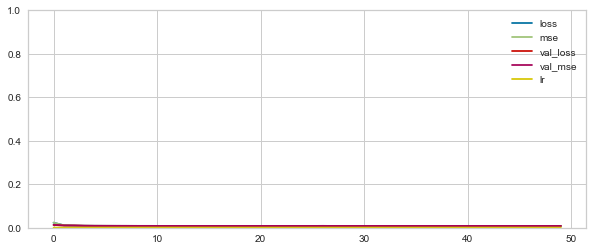

10000/10000 - 0s - loss: 0.0086 - mse: 0.0086
Resultado ajuste modelo:  [0.008607353204488754, 0.008607356]





In [46]:
# compile - Train and Evaluate

model.compile(loss= tf.keras.losses.MeanSquaredError(),
              optimizer = 'Adam',metrics = ['mse'])

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'best_autoencoder_ejemplo.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=10,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

## Callabck de ajuste de learning rate (lr)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.975,patience=5,verbose=2)


#########################################

# fit - ajuste de modelo
history = model.fit(x_train, x_train,
                    epochs=50, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    #batch_size = 64, # dimension de bloques de datos a pasar (batch de datos)
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp,lrs], ## se indican callbacks checkpoint,parada y learning rate
                    validation_data=(x_test,x_test))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
try:
    model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint
except:
    print('No se pudo leer archivo .h5 de mejor modelo entrenado..puede no existir archivo .h5 creado')
    
#######################################

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10,4))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento
rendimiento = model.evaluate(x_test, x_test, verbose=2)
print('Resultado ajuste modelo: ',rendimiento)
print('\n\n')

# fin

In [ ]:
# Ver parametros del modelo

print('\nEncoder:')
print(model.encoder.summary())
keras.utils.plot_model(model, 'autoencoder_ejemplo.png', show_shapes = True) # ver grafico de modelo

print('\n\nDecoder:')
print(model.decoder.summary())
keras.utils.plot_model(model, 'autoencoder_ejemplo.png', show_shapes = True) # ver grafico de modelo

print('\n')
# fin

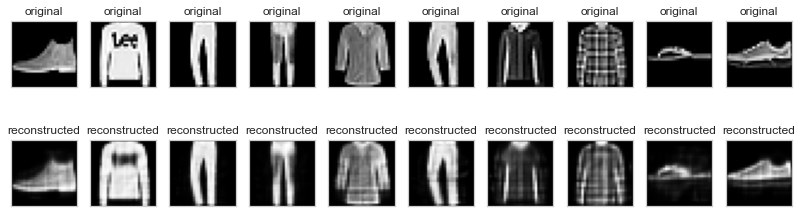

In [48]:
# Testeo del modelo ajustado

# Recordar que de la clase "Autoencoder" se creó una instancia llamada "autoencoder"
# es esta instancia la que fue entrenada, ahora se puede acceder a sus atributos
# autoencoder.encoder(input) ... autoencoder.decoder(encoded) son elementos de la instancia ajustada

# input -encoder
encoded_imgs = model.encoder(x_test).numpy()

# encoder - decoder
decoded_imgs = model.decoder(encoded_imgs).numpy()

#####################################################

# Tamaño de figura de visualizacion
n = 10

plt.figure(figsize=(14,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
# fin



Imagen original aleatoria:  2901


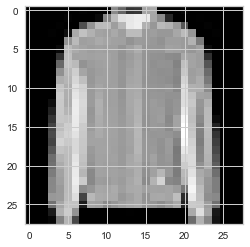


Imagen predicha por Autoencoder:


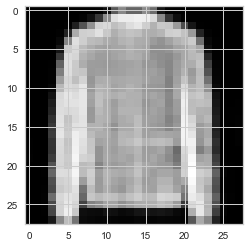

In [54]:
## Prediccion - Evaluacion de modelo creado

# Seleccion de una imagen aleatoria de testeo
valor = np.random.randint(0,x_test.shape[0],1)
valor=valor[0]
print('\n\nImagen original aleatoria: ',valor)
plt.imshow(x_test[valor])
plt.show() # mostrar

# Predecir con el modelo entrenado - imagen aleatoria 
imagen = x_test[valor]

# NOTA: Cuando se pasa solo 01 imagen para predecir con el modelo, se debe agregar una
# dimension adicional, ya que el modelo fue entrenado con tensores de m*32*32*3
# por lo que esperará que se le pase 1*32*32*3 ... la imagen es de solo 32*32*3 falta el "1" inicial
y_pred = model.predict(imagen[np.newaxis]) 
print('\nImagen predicha por Autoencoder:')
plt.imshow(y_pred[0])
plt.show() # mostrar

# fin

# AutoEncoder - Limpieza de Ruido en imagenes 

In [71]:
# cargar datos

(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print('\nDimension imagenes train: ',x_train.shape)
print('Dimension imagenes test: ',x_test.shape)

x_train = x_train[..., tf.newaxis] # agregar nueva dimension
x_test = x_test[..., tf.newaxis] # agregar nueva dimension

print('-----------------------')
print('\nDimension imagenes train: ',x_train.shape)
print('Dimension imagenes test: ',x_test.shape)
print('\n')

# fin


Dimension imagenes train:  (60000, 28, 28)
Dimension imagenes test:  (10000, 28, 28)
-----------------------

Dimension imagenes train:  (60000, 28, 28, 1)
Dimension imagenes test:  (10000, 28, 28, 1)




In [72]:
# Crear imagenes con ruido aleatorio gaussiano

# nivel de ruido (amplitud de los valores de ruido añadidos)
noise_factor = 0.2

# random.normal es gaussiana (media=0, varianza = 1)
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

# Recortar los valores que excedan el valor de 1.0 ... ejem: valor = 1.24, clip(1.24, min=0.0, max=1.0) = 1.0 (valor maximo)
# igualmente si esta por debajo ejemp: valor = -2.35, clip(-2.35, min=0.0, max=1.0) = 0.0 (valor minimo)
# clip recorta valores encima del umbral maximo/minimo indicado (clip_value_min , clip_value_max)

# clip
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

# fin

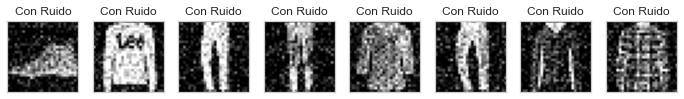

In [73]:
# ver algunas muestras creadas con ruido

# cantidad imagenes
n = 8

plt.figure(figsize=(14, 10))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("Con Ruido")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# fin

In [74]:
# Modelo Convolucional

class SinRuido(keras.Model):
    def __init__(self):
        super(SinRuido, self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.Input(shape=(28,28,1)), # imagen de entrada
            keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=2),
            keras.layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=2)
        ])
        
        self.decoder = keras.Sequential([
            keras.layers.Conv2DTranspose(8, kernel_size = 3, strides=2, activation='relu',padding='same'),
            keras.layers.Conv2DTranspose(16, kernel_size =3, strides=2, activation='relu', padding='same'),
            keras.layers.Conv2D(1,kernel_size=(3,3),activation='sigmoid',padding='same')
        ])
        
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# fin

In [75]:
# creamos una instancia de la clase creada

model = SinRuido() # creamos modelo de autoencoder para limpiar ruido en imagenes

# fin

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
59680/60000 [============================>.] - ETA: 0s - loss: 0.0143 - mse: 0.0143
Epoch 00001: val_loss improved from inf to 0.00562, saving model to best_autoencoder_sin_ruido.h5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2/50
59744/60000 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 00002: val_loss improved from 0.00562 to 0.00419, saving model to best_autoencoder_sin_ruido.h5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3/50
59936/60000 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00003: val_loss improved from 0.00419 to 0.00380, saving model to best_autoencoder_sin_ruido.h5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0

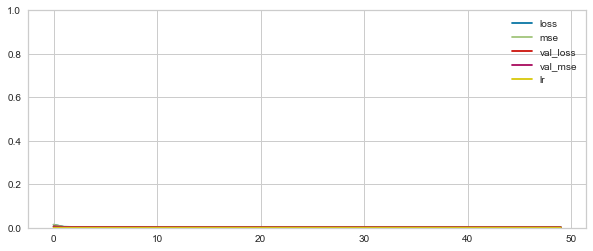

10000/10000 - 1s - loss: 0.0022 - mse: 0.0022
Resultado ajuste modelo:  [0.00219127598144114, 0.002191276]





In [76]:
# compile - Train and Evaluate

model.compile(loss= tf.keras.losses.MeanSquaredError(),
              optimizer = 'Adam',metrics = ['mse'])

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'best_autoencoder_sin_ruido.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=10,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

## Callabck de ajuste de learning rate (lr)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.975,patience=5,verbose=2)

#########################################

# fit - ajuste de modelo
history = model.fit(x_train, x_train,
                    epochs=50, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    #batch_size = 64, # dimension de bloques de datos a pasar (batch de datos)
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp,lrs], ## se indican callbacks checkpoint,parada y learning rate
                    validation_data=(x_test,x_test))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
try:
    model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint
except:
    print('No se pudo leer archivo .h5 de mejor modelo entrenado..puede no existir archivo .h5 creado')
    
#######################################

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10,4))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento
rendimiento = model.evaluate(x_test, x_test, verbose=2)
print('Resultado ajuste modelo: ',rendimiento)
print('\n\n')

# fin

In [82]:
# Ver parametros del modelo

print('\nEncoder:')
print(model.encoder.summary())
keras.utils.plot_model(model, 'sin_ruido_encoder.png', show_shapes = True) # ver grafico de modelo

print('\n\nDecoder:')
print(model.decoder.summary())
keras.utils.plot_model(model, 'sin_ruido_decoder.png', show_shapes = True) # ver grafico de modelo

print('\n')
# fin


Encoder:
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
None


Decoder:
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran multiple                  584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr multiple                  1168      
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  145       
To

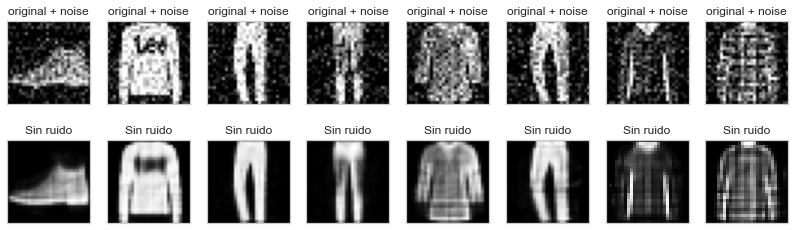

In [89]:
# Ver algunas imagenes predichas por el modelo de eliminacion/filtrado de ruido

# Seleccionar imagenes a mostrar
n = 8
plt.figure(figsize=(15, 8))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title('Sin ruido')
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

# fin



Imagen original aleatoria:  5273


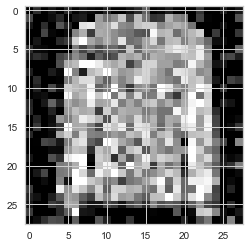


Limpieza por Autoencoder:


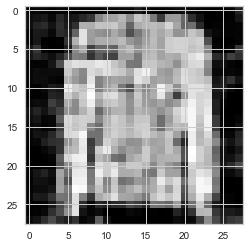

In [105]:
## Prediccion - Evaluacion de modelo creado

# Seleccion de una imagen aleatoria de testeo
valor = np.random.randint(0,x_test_noisy.shape[0],1)
valor=valor[0]
print('\n\nImagen original aleatoria: ',valor)
plt.imshow(x_test_noisy[valor])
plt.show() # mostrar

# Predecir con el modelo entrenado - imagen aleatoria 
imagen = x_test_noisy[valor]

# NOTA: Cuando se pasa solo 01 imagen para predecir con el modelo, se debe agregar una
# dimension adicional, ya que el modelo fue entrenado con tensores de m*32*32*3
# por lo que esperará que se le pase 1*32*32*3 ... la imagen es de solo 32*32*3 falta el "1" inicial

#y_pred = model.predict(imagen[np.newaxis]) 
imagen_pred = model.predict(imagen[np.newaxis]) 
print('\nLimpieza por Autoencoder:')
plt.imshow(imagen_pred[0])
plt.show() # mostrar

# fin

#  AutoEncoder - Deteccion de anomalias

Concepto: Se espera hacer un modelo de autoencoder con datos de señales sin anomalia, por lo que el autoencoder lo que hará será codificar-reconstruir la imagen de entrada y obtener a la salida la misma una señal parecida a la entrada. 

La hipotesis se basa en que si se tiene una anomalia en la señal, se podría tener un error de reconstruccion con el autoencoder superior al error para una señal normal.

In [46]:
# cargar datos de Electrocardioagramas

dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values

# Las etiquetas se encuentran en la ultima columna (0 = anormal / 1 = normal)
labels = raw_data[:,-1] 

# datos ... todas columnas excepto ultima
data = raw_data[:,0:-1]

# Dividir datos en conjunto de entrenamiento y validacion
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

############################################################################################
# Normalizar data a rango [0-1]

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data-min_val)/(max_val-min_val)
test_data = (test_data-min_val)/(max_val-min_val)

# tipo dato
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

###########################################################################################
### Solo usar datos "normales" (etiqueta = 1)
# separar normal de anormal

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

# Normal
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

# Anomalos
anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

###########################################################################################

dataframe.head() # ver algunos datos leidos originales 

# fin

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0



Señal Normal

Indice aleatorio:  1436


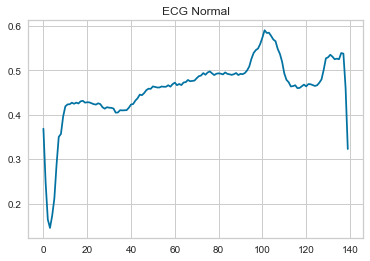

In [47]:
# Explorar datos de EGC normal

# Seleccion de una señal aleatoria
valor = np.random.randint(0,normal_train_data.shape[0],1)
valor=valor[0] # indice aleatorio seleccionado
print('\nSeñal Normal')
print('\nIndice aleatorio: ',valor)

# grafica
plt.grid(True)
plt.plot(np.arange(140), normal_train_data[valor])
plt.title('ECG Normal')
plt.show()

# fin


Señal Anomala

Indice aleatorio:  555


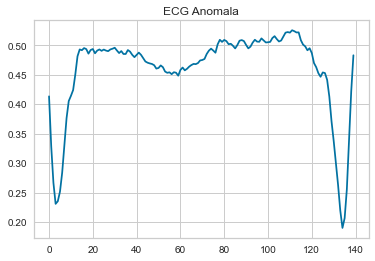

In [48]:
# Explorar datos de EGC anormal o anomalo

# Seleccion de una señal aleatoria
valor = np.random.randint(0,anomalous_train_data.shape[0],1)
valor=valor[0] # indice aleatorio seleccionado
print('\nSeñal Anomala')
print('\nIndice aleatorio: ',valor)

# grafica
plt.grid(True)
plt.plot(np.arange(140), anomalous_train_data[valor])
plt.title('ECG Anomala')
plt.show()

# fin

In [49]:
# Definir arquitectura de modelo ... crear Clase para el Modelo

class AnomalyDetector(keras.Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dense(8, activation="relu")
        ])

        self.decoder = tf.keras.Sequential([
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(140, activation="sigmoid")
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# fin

In [50]:
# creamos una instancia de la clase creada

model = AnomalyDetector() # creamos modelo de detector de anomalias mediante autoencoder

# fin

Train on 2359 samples, validate on 1000 samples
Epoch 1/200
 256/2359 [==>...........................] - ETA: 2s - loss: 0.0586 - mae: 0.0586
Epoch 00001: val_loss improved from inf to 0.05030, saving model to best_autoencoder_anomalia.h5
2359/2359 [==============================] - 0s 161us/sample - loss: 0.0562 - mae: 0.0562 - val_loss: 0.0503 - val_mae: 0.0503
Epoch 2/200
 256/2359 [==>...........................] - ETA: 0s - loss: 0.0520 - mae: 0.0520
Epoch 00002: val_loss improved from 0.05030 to 0.04604, saving model to best_autoencoder_anomalia.h5
2359/2359 [==============================] - 0s 23us/sample - loss: 0.0484 - mae: 0.0484 - val_loss: 0.0460 - val_mae: 0.0460
Epoch 3/200
 256/2359 [==>...........................] - ETA: 0s - loss: 0.0430 - mae: 0.0430
Epoch 00003: val_loss improved from 0.04604 to 0.04247, saving model to best_autoencoder_anomalia.h5
2359/2359 [==============================] - 0s 24us/sample - loss: 0.0397 - mae: 0.0397 - val_loss: 0.0425 - val_mae:

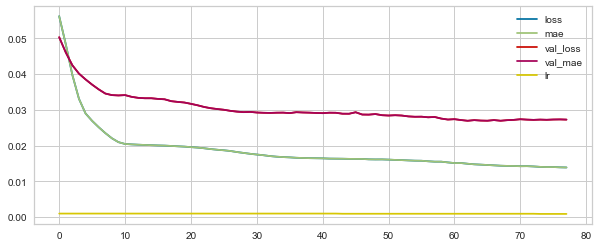


Rendimiento ajuste modelo:
-------------------------------
560/560 - 0s - loss: 0.0146 - mae: 0.0146
Ajuste datos normales:  [0.014624993263610771, 0.014624992]


440/440 - 0s - loss: 0.0426 - mae: 0.0426
Ajuste datos anormales:  [0.04262472384355285, 0.04262472]




In [51]:
# Entrenar y Evaluar Modelo de Autoencoder para deteccion de anomalias

model.compile(loss= 'mae',
              optimizer = 'Adam',metrics = ['mae'])

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'best_autoencoder_anomalia.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=15,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

## Callabck de ajuste de learning rate (lr)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.95,patience=10,verbose=2)


######################################################################################

# fit - ajuste de modelo5
history = model.fit(normal_train_data,normal_train_data,
                    epochs=200, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    batch_size = 256, # dimension de bloques de datos a pasar (batch de datos)
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp,lrs], ## se indican callbacks checkpoint,parada y learning rate
                    validation_data=(test_data,test_data))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
try:
    model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint
except:
    print('No se pudo leer archivo .h5 de mejor modelo entrenado..puede no existir archivo .h5 creado')

######################################################################################
    
# Guardar mejor modelo _ ultimo modelo entrenado
#model.save_weights(direccion_sin, save_format='tf')
#model.save(direccion_sin, save_format='tf')

# Falta explorar como cargar adecuadamente un modelo personalizado ("custom model")

######################################################################################

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10,4))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Test de rendimiento
print('\nRendimiento ajuste modelo:')
print('-------------------------------')
rendimiento = model.evaluate(normal_test_data,normal_test_data, verbose=2)
print('Ajuste datos normales: ',rendimiento)
print('\n')

rendimiento = model.evaluate(anomalous_test_data,anomalous_test_data, verbose=2)
print('Ajuste datos anormales: ',rendimiento)

print('\n')

# fin

### Graficas de Resultado de Autoencoder - Señales Normales


Señal Normal

Indice aleatorio:  234


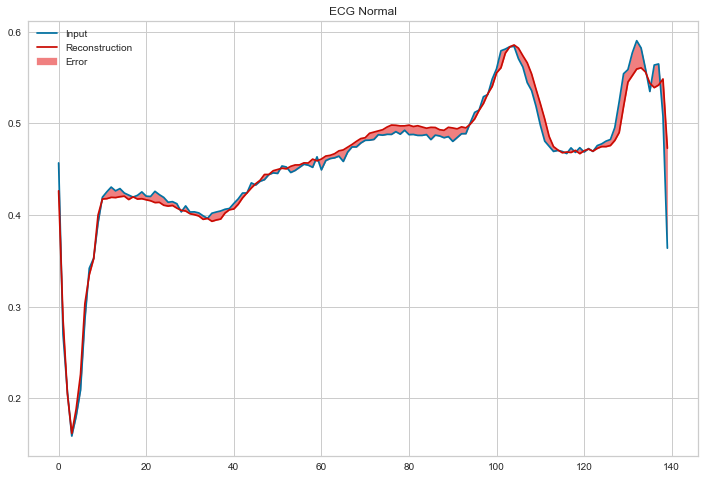



Calculo de diferencia entre señales:
MSE:  0.000206
MAE:  0.008771




In [52]:
# Modelo con Señales Normales - Ver Resultados Modelo

# datos codificadas 
encoded_imgs = model.encoder(normal_test_data).numpy()

# datos reconstruidos o decodificados
decoded_imgs = model.decoder(encoded_imgs).numpy()

# Seleccion de una señal aleatoria normal
valor = np.random.randint(0,normal_test_data.shape[0],1)
valor=valor[0] # indice aleatorio seleccionado
print('\nSeñal Normal')
print('\nIndice aleatorio: ',valor)

# Graficar diferencia entre original y reconstruido con autoencoder
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(normal_test_data[valor],'b') # curva color azul 
plt.plot(decoded_imgs[valor],'r') # curva color rojo
plt.fill_between(np.arange(140), decoded_imgs[valor], normal_test_data[valor], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title('ECG Normal')
plt.show()

# Calculos metricas de ajuste de señales
mse_est = skl.metrics.mean_squared_error(normal_test_data[valor],decoded_imgs[valor])
mae_est = skl.metrics.mean_absolute_error(normal_test_data[valor],decoded_imgs[valor])

print('\n\nCalculo de diferencia entre señales:')
print('MSE: ',np.round(mse_est,6))
print('MAE: ',np.round(mae_est,6))
print('\n')

# fin

### Graficas de Resultado de Autoencoder - Señales Anormales


Señal Anormal

Indice aleatorio:  343


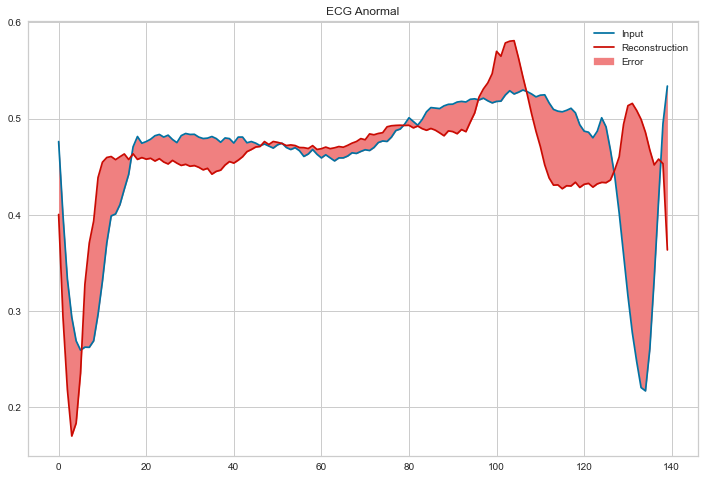



Calculo de diferencia entre señales:
MSE:  0.001725
MAE:  0.031819




In [53]:
# Modelo con Señales Anormales - Ver Resultados Modelo

# datos codificadas 
encoded_imgs = model.encoder(anomalous_test_data).numpy()

# datos reconstruidos o decodificados
decoded_imgs = model.decoder(encoded_imgs).numpy()

# Seleccion de una señal aleatoria anormal
valor = np.random.randint(0,anomalous_test_data.shape[0],1)
valor=valor[0] # indice aleatorio seleccionado
print('\nSeñal Anormal')
print('\nIndice aleatorio: ',valor)

# Graficar diferencia entre original y reconstruido con autoencoder
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(anomalous_test_data[valor],'b') # curva color azul 
plt.plot(decoded_imgs[valor],'r') # curva color rojo
plt.fill_between(np.arange(140), decoded_imgs[valor], anomalous_test_data[valor], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title('ECG Anormal')
plt.show()

# Calculos metricas de ajuste de señales
mse_est = skl.metrics.mean_squared_error(anomalous_test_data[valor],decoded_imgs[valor])
mae_est = skl.metrics.mean_absolute_error(anomalous_test_data[valor],decoded_imgs[valor])

print('\n\nCalculo de diferencia entre señales:')
print('MSE: ',np.round(mse_est,6))
print('MAE: ',np.round(mae_est,6))
print('\n')

# fin

### Generacion de Datos para Calculo de Umbral - Datos Normales


Porcentaje datos seleccionado:  80.0 %
Equivalente en cant. datos:  1887


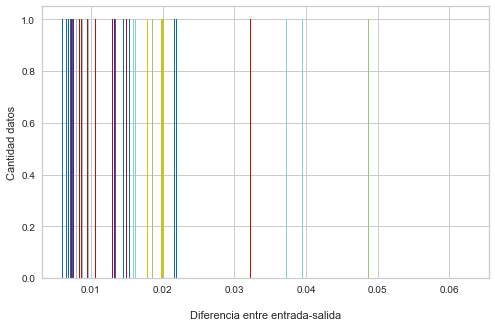


Umbral propuesto (mean + 1(stdv)):  0.02242045570164919
mean:  0.014791925
stdv:  0.0076285303




In [54]:
# Datos Normales: Evaluar cual es el umbral de error entre señal original

# Seleccion  de datos normales aleatoriamente
porcentaje = 0.8 # valor decimal [0,1] ... indicar cuantos datos del total considerar para el calculo

muestras = normal_train_data.shape[0]
indices = np.random.choice(muestras, size=int(muestras*porcentaje), replace=False)
indices = tf.convert_to_tensor(indices, dtype=tf.int32)
datos = tf.gather(normal_train_data, indices, axis=0)
print('\nPorcentaje datos seleccionado: ',porcentaje*100.0,'%')
print('Equivalente en cant. datos: ',datos.shape[0])

# obtener datos mediante el modelo autoencoder entrenado
reconstructions = model.predict(datos)

# Calculo de mae: mean average error (Error promedio).. es L1 ... mean(|y-y_pred|)
train_loss = tf.keras.losses.mae(reconstructions, datos)

plt.figure(figsize=(8,5))
plt.hist(train_loss)
plt.xlabel("\nDiferencia entre entrada-salida")
plt.ylabel("Cantidad datos")
plt.show()

# fin

### Generacion de Datos para Calculo de Umbral - Datos Anormales


Porcentaje datos seleccionado:  80.0 %
Equivalente en cant. datos:  1311


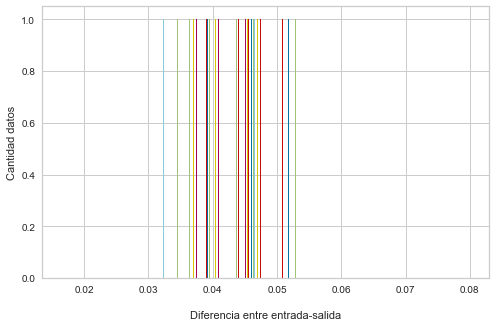

Estadisticas datos anomalos:
mean:  0.042497516
stdv:  0.00642642




In [55]:
# Datos Anomalos: Evaluar cual es el umbral de error entre señal original

# Seleccion  de datos anormales aleatoriamente
porcentaje = 0.8 # valor decimal [0,1] ... indicar cuantos datos del total considerar para el calculo

muestras = anomalous_train_data.shape[0]
indices = np.random.choice(muestras, size=int(muestras*porcentaje), replace=False)
indices = tf.convert_to_tensor(indices, dtype=tf.int32)
datos2 = tf.gather(anomalous_train_data, indices, axis=0)
print('\nPorcentaje datos seleccionado: ',porcentaje*100.0,'%')
print('Equivalente en cant. datos: ',datos2.shape[0])

# obtener datos mediante el modelo autoencoder entrenado
reconstructions2 = model.predict(datos2)

# Calculo de mae: mean average error (Error promedio).. es L1 ... mean(|y-y_pred|)
train_loss2 = tf.keras.losses.mae(reconstructions2, datos2)


plt.figure(figsize=(8,5))
plt.hist(train_loss2)
plt.xlabel("\nDiferencia entre entrada-salida")
plt.ylabel("Cantidad datos")
plt.show()

print('Estadisticas datos anomalos:')
print("mean: ",np.mean(train_loss2))
print("stdv: ",np.std(train_loss2))
print('\n')

# fin

### Evaluacion de mejores umbrales para Clasificacion "normal" vs "anormal"

Stored 'umbral_q' (float64)


Modelo Recomendado - Minimizacion por Percentil:



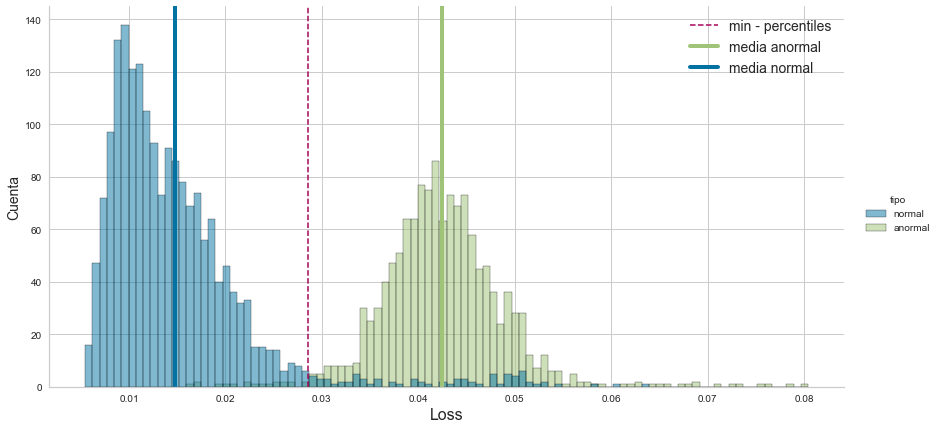

Ubral de Optimizacion min-percentil:  0.02855
------------------------------------------------
Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9431    0.9855    0.9638      1311
      Normal     0.9896    0.9587    0.9739      1887

    accuracy                         0.9697      3198
   macro avg     0.9663    0.9721    0.9689      3198
weighted avg     0.9705    0.9697    0.9698      3198


--------------------------------------------------------------
--------------------------------------------------------------

Escoger otros puntos para exploracion:

Modelo con umbral:  0.02427


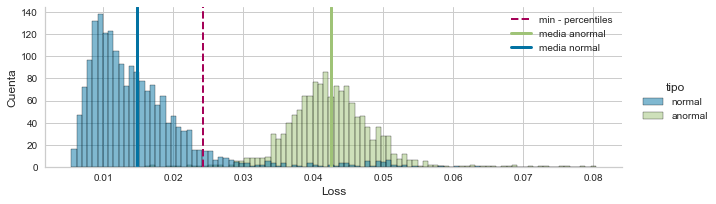

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9066    0.9924    0.9476      1311
      Normal     0.9943    0.9290    0.9605      1887

    accuracy                         0.9550      3198
   macro avg     0.9505    0.9607    0.9541      3198
weighted avg     0.9584    0.9550    0.9552      3198


Modelo con umbral:  0.02513


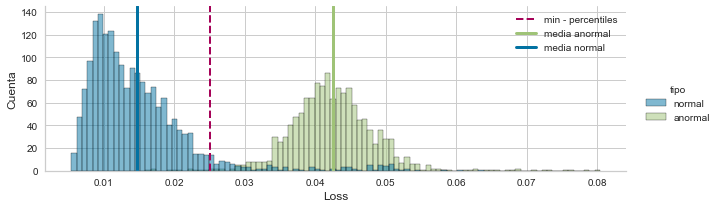

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9168    0.9916    0.9527      1311
      Normal     0.9938    0.9375    0.9648      1887

    accuracy                         0.9597      3198
   macro avg     0.9553    0.9645    0.9588      3198
weighted avg     0.9622    0.9597    0.9599      3198


Modelo con umbral:  0.02598


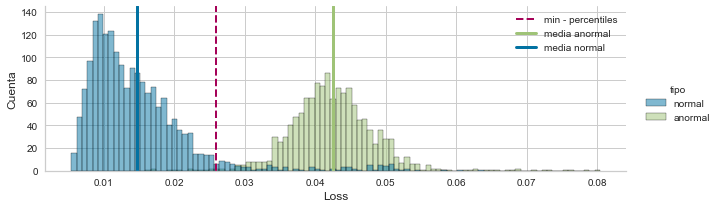

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9244    0.9893    0.9558      1311
      Normal     0.9922    0.9438    0.9674      1887

    accuracy                         0.9625      3198
   macro avg     0.9583    0.9666    0.9616      3198
weighted avg     0.9644    0.9625    0.9626      3198


Modelo con umbral:  0.02684


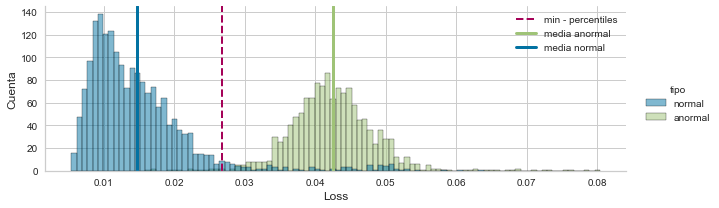

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9310    0.9886    0.9589      1311
      Normal     0.9917    0.9491    0.9699      1887

    accuracy                         0.9653      3198
   macro avg     0.9614    0.9688    0.9644      3198
weighted avg     0.9668    0.9653    0.9654      3198


Modelo con umbral:  0.0277


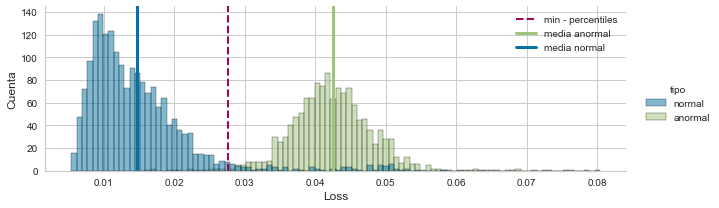

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9356    0.9870    0.9607      1311
      Normal     0.9906    0.9528    0.9714      1887

    accuracy                         0.9669      3198
   macro avg     0.9631    0.9699    0.9660      3198
weighted avg     0.9681    0.9669    0.9670      3198



-------------------------------------------------------
Valor de Optimizacion por Minimizacion de Percentiles
-------------------------------------------------------

Modelo con umbral:  0.02855


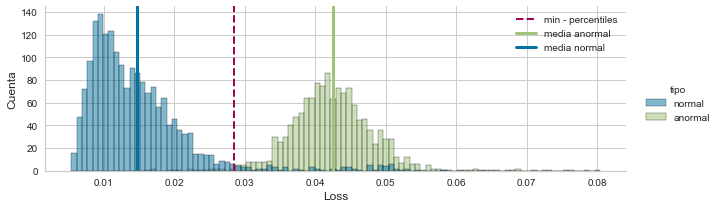

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9431    0.9855    0.9638      1311
      Normal     0.9896    0.9587    0.9739      1887

    accuracy                         0.9697      3198
   macro avg     0.9663    0.9721    0.9689      3198
weighted avg     0.9705    0.9697    0.9698      3198


Modelo con umbral:  0.02941


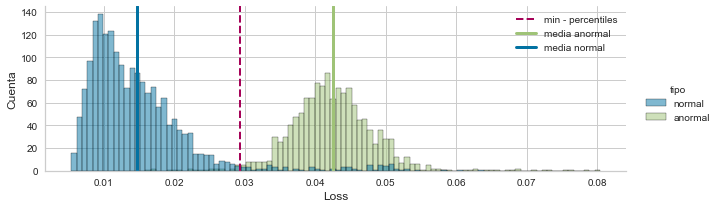

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9457    0.9825    0.9637      1311
      Normal     0.9875    0.9608    0.9739      1887

    accuracy                         0.9697      3198
   macro avg     0.9666    0.9716    0.9688      3198
weighted avg     0.9703    0.9697    0.9698      3198


Modelo con umbral:  0.03026


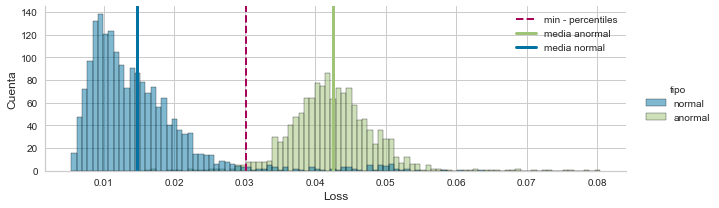

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9475    0.9771    0.9621      1311
      Normal     0.9837    0.9624    0.9729      1887

    accuracy                         0.9684      3198
   macro avg     0.9656    0.9697    0.9675      3198
weighted avg     0.9689    0.9684    0.9685      3198


Modelo con umbral:  0.03112


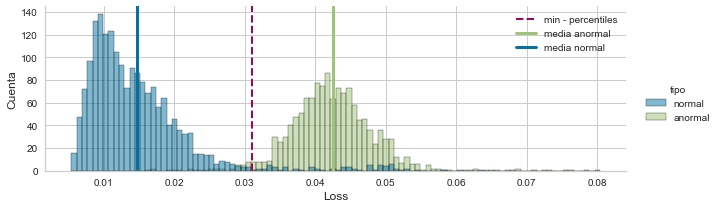

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9492    0.9695    0.9592      1311
      Normal     0.9785    0.9640    0.9712      1887

    accuracy                         0.9662      3198
   macro avg     0.9638    0.9667    0.9652      3198
weighted avg     0.9665    0.9662    0.9663      3198


Modelo con umbral:  0.03198


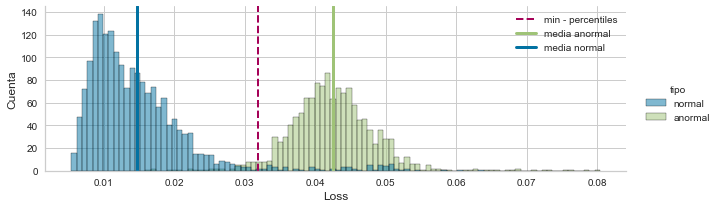

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9510    0.9626    0.9568      1311
      Normal     0.9738    0.9656    0.9697      1887

    accuracy                         0.9644      3198
   macro avg     0.9624    0.9641    0.9632      3198
weighted avg     0.9645    0.9644    0.9644      3198


Modelo con umbral:  0.03283


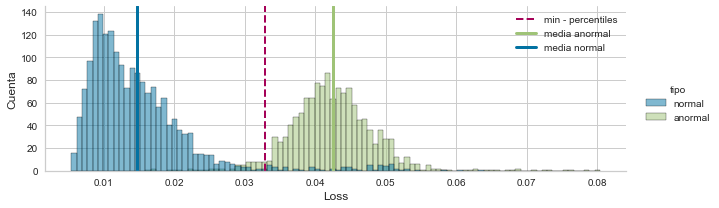

Reporte de clasificacion: 
              precision    recall  f1-score   support

     Anomalo     0.9507    0.9565    0.9536      1311
      Normal     0.9697    0.9656    0.9676      1887

    accuracy                         0.9619      3198
   macro avg     0.9602    0.9610    0.9606      3198
weighted avg     0.9619    0.9619    0.9619      3198



In [161]:
## Evaluacion de mejores umbrales (threshold) a considerar para separacion de clases (normal vs anomalo)

# datos normales
y_normal =train_loss.numpy()
len_normal = y_normal.shape[0]

# datos anomalos
y_anormal =train_loss2.numpy()
len_anormal = y_anormal.shape[0]

# vector de prediccion
y_pred = np.zeros(len_normal + len_anormal)    # valores predichos
y_target = np.zeros(len_normal + len_anormal)  # clasificacion ideal 0 o 1

# Indicar valores al objetivo de clasificacion (target) y al valor predicho decimal o exacto del modelo 
y_target[:len_normal] = 1 # se coloca a 1 las señales normales
y_target[len_normal:] = 0 # se coloca a 0 las señales anormales : Ojo: No es necesario esta linea de codigo y_pred se define con ceros

y_pred[:len_normal] = y_normal.copy()   # se coloca a 1 las señales normales
y_pred[len_normal:] = y_anormal.copy()  # se coloca a 0 las señales anormales : Ojo: No es necesario esta linea de codigo y_pred se define con ceros

##########################################################################################################################

## Calculo de Mejor umbral basado en histogramas

df1 = pd.DataFrame({'loss':train_loss})
df1['tipo']='normal'

df2 = pd.DataFrame({'loss':train_loss2})
df2['tipo']='anormal'

media1 = df1['loss'].copy().mean()
media2 = df2['loss'].copy().mean()

signo = np.sign(media1 - media2 + 1e-10) # signo (+1,0,-1)
supe = max([media1,media2])
infe = min([media1,media2])

tramos = 150
xpoints = np.linspace(infe,supe,num=tramos)
qdif = np.zeros(len(xpoints))

for ii in range(len(qdif)):
    qdif[ii] = 100.0 - scipy.stats.percentileofscore(df1['loss'], xpoints[ii], kind='mean') + scipy.stats.percentileofscore(df2['loss'], xpoints[ii], kind='mean')

# Dataframe con valores de 1-q1+q2
df_q = pd.DataFrame({'xp':xpoints,'qdif':qdif})
df_q = df_q.sort_values(by='qdif',ascending=True) # De mayor a menor (hacia abajo)

# mejor umbral
umbral_q = df_q.iloc[0]['xp'] # mejor umbral

# Guardar mejor umbral segun minimizacion de percentiles
%store umbral_q 

#############################################################################################################################

print('\n\nModelo Recomendado - Minimizacion por Percentil:\n')
graf = sns.displot(data=dft,x='loss',bins=100,height=6,aspect=2,hue='tipo')
plt.axvline(umbral_q,color='m',linewidth=1.5,ls='--',label='min - percentiles')
plt.rcParams['font.size'] = '12'
plt.xlabel('Loss', fontsize=16)
plt.ylabel('Cuenta',fontsize=14)
plt.axvline(np.mean(train_loss2),color='g',linewidth=4,label='media anormal')
plt.axvline(np.mean(train_loss),color='b',linewidth=4,label='media normal')
plt.legend(prop={'size':14})
plt.show()

############################################################################################################################

# Utilizar umbral para generar clasificacion 0 o 1
y_pred_q = 1*(y_pred < umbral_q)
names = ['Anomalo', 'Normal'] # clases objetivo a indicar al reporte
print('Ubral de Optimizacion min-percentil: ',np.round(umbral_q,5))
print('------------------------------------------------')
print('Reporte de clasificacion: ')
print(skl.metrics.classification_report(y_target, y_pred_q, target_names = names,digits=4))

############################################################################################################################
############################################################################################################################

### Resultados secundarios
media1 = df1['loss'].copy().mean()
media2 = df2['loss'].copy().mean()

deltax = (umbral_q*0.3) # en una escala porcentual alrededor del optimo por minimizacion por percentiles
tramos = 11 # recomendable un numero impar
xpoints = np.linspace(umbral_q - (deltax/2),umbral_q + (deltax/2),num=tramos)

print('\n--------------------------------------------------------------')
print('--------------------------------------------------------------')
print('\nEscoger otros puntos para exploracion:')

medio_id = int(tramos/2)

for idx in range(len(xpoints)):
    
    # valor igual o muy cercano al valor de Optimizacion por Minimizacion por Percentiles
    if(idx == medio_id):
        print('\n\n-------------------------------------------------------')
        print('Valor de Optimizacion por Minimizacion de Percentiles')
        print('-------------------------------------------------------')
    
    print('\nModelo con umbral: ',np.round(xpoints[idx],5))
    graf = sns.displot(data=dft,x='loss',bins=100,height=3,aspect=3,hue='tipo')
    plt.axvline(xpoints[idx],color='m',linewidth=2,ls='--',label='min - percentiles')
    plt.rcParams['font.size'] = '10'
    plt.xlabel('Loss', fontsize=12)
    plt.ylabel('Cuenta',fontsize=12)
    plt.axvline(np.mean(train_loss2),color='g',linewidth=3,label='media anormal')
    plt.axvline(np.mean(train_loss),color='b',linewidth=3,label='media normal')
    plt.legend(prop={'size':10})
    plt.show()
    
    # Reporte de clasificacion bajo umbral seleccionado
    print('Reporte de clasificacion: ')
    y_pred_q_aux = 1*(y_pred < xpoints[idx]) # predecir con umbral alrededor del "optimo" por percentiles
    print(skl.metrics.classification_report(y_target, y_pred_q_aux, target_names = names,digits=4))

# fin

### Predicción con Modelo - Umbral entrenados

In [282]:
# Inicializar variables de experimento o medicion del modelo

# NOTA: estas variables se aplicarán en el siguiente bloque de codigo

aciertos = 0 ## contará cuantas veces acierta 
total = 0 ## contará cuantas veces en total 
precision = None # precision global

umbral_elegido = None # umbral para el Discriminador

# Leer umbrales estimados en bloque anterior de curvas ROC/P&R/P
try:
    %store -r umbral_q      
    umbral_elegido = umbral_q

except:
    umbral_elegido = 0.5 # se asigna manualmente un umbral para la toma de decision
    print('No se encontró registrado umbrales optimos para el Discriminador')

# fin


Señal Anormal
Indice aleatorio:  127


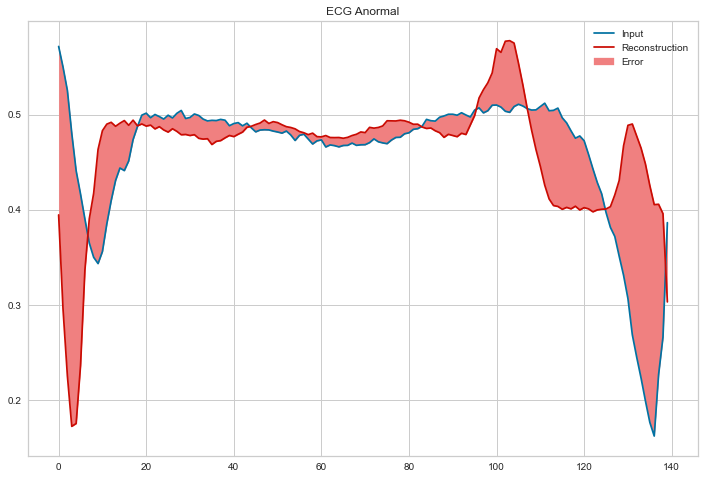


Calculo de diferencia entre señales:
MSE:  0.007455
MAE:  0.051387
---------------------
Prediccion : Anormal
Valor Real : Anormal
-------------------------------
Precision:  95.15 %
Total ejemplos:  103




In [385]:
## Prediccion de ejemplos aleatorios

elegir = np.random.random(1) # escoger un numero aleatorio entre [0,1]
elegir = 1 if elegir >= 0.5 else 0 # colocar a 0 o 1 el valor "elegir" .. Equiprobabilidad entre elegir 0 o 1 ...(Normal y Anormal)

if(elegir>0):

    # Modelo con Señales Normales - Ver Resultados Modelo

    # datos codificadas 
    encoded_imgs = model.encoder(normal_test_data).numpy()

    # datos reconstruidos o decodificados
    decoded_imgs = model.decoder(encoded_imgs).numpy()

    # Seleccion de una señal aleatoria normal
    valor = np.random.randint(0,normal_test_data.shape[0],1)
    valor=valor[0] # indice aleatorio seleccionado
    print('\nSeñal Normal')
    print('Indice aleatorio: ',valor)

    # Graficar diferencia entre original y reconstruido con autoencoder
    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.plot(normal_test_data[valor],'b') # curva color azul 
    plt.plot(decoded_imgs[valor],'r') # curva color rojo
    plt.fill_between(np.arange(140), decoded_imgs[valor], normal_test_data[valor], color='lightcoral' )
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.title('ECG Normal')
    plt.show()

    # Calculos metricas de ajuste de señales
    mse_est = skl.metrics.mean_squared_error(normal_test_data[valor],decoded_imgs[valor])
    mae_est = skl.metrics.mean_absolute_error(normal_test_data[valor],decoded_imgs[valor])

    # Se determina si es normal (1) o anormal (0) ... Recordar que en este caso el Normal < umbral .. menor error cometido "mae"
    prediccion_tipo = 'Normal' if mae_est < umbral_q else 'Anormal'
    
    # Concuerda que se clasificó como "Normal" en este caso especifico
    correcto = 1 if mae_est < umbral_q else 0 
    
    total += 1 ## se aumenta en 01 el total de experimentos de testeo 
    aciertos += correcto # en caso detecte real se aumenta
    
    # Medida de precision
    precision = round(100.0*aciertos/total,2)

    print('\nCalculo de diferencia entre señales:')
    print('MSE: ',np.round(mse_est,6))
    print('MAE: ',np.round(mae_est,6))
    print('---------------------')
    print('Prediccion :',prediccion_tipo)
    print('Valor Real : Normal')

####################################################################################################################

else:

    # Modelo con Señales Anormales - Ver Resultados Modelo

    # datos codificadas 
    encoded_imgs = model.encoder(anomalous_test_data).numpy()

    # datos reconstruidos o decodificados
    decoded_imgs = model.decoder(encoded_imgs).numpy()

    # Seleccion de una señal aleatoria anormal
    valor = np.random.randint(0,anomalous_test_data.shape[0],1)
    valor=valor[0] # indice aleatorio seleccionado
    print('\nSeñal Anormal')
    print('Indice aleatorio: ',valor)

    # Graficar diferencia entre original y reconstruido con autoencoder
    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.plot(anomalous_test_data[valor],'b') # curva color azul 
    plt.plot(decoded_imgs[valor],'r') # curva color rojo
    plt.fill_between(np.arange(140), decoded_imgs[valor], anomalous_test_data[valor], color='lightcoral' )
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.title('ECG Anormal')
    plt.show()

    # Calculos metricas de ajuste de señales
    mse_est = skl.metrics.mean_squared_error(anomalous_test_data[valor],decoded_imgs[valor])
    mae_est = skl.metrics.mean_absolute_error(anomalous_test_data[valor],decoded_imgs[valor])

    # Se determina si es normal (1) o anormal (0) ... Recordar que en este caso el Anormal > umbral .. menor error cometido "mae"
    prediccion_tipo = 'Normal' if mae_est < umbral_q else 'Anormal'
    
    # Concuerda que se clasificó como "Anormal" en este caso especifico
    correcto = 1 if mae_est >= umbral_q else 0 
    
    total += 1 ## se aumenta en 01 el total de experimentos de testeo 
    aciertos += correcto # en caso detecte real se aumenta
    
    # Medida de precision
    precision = round(100.0*aciertos/total,2)

    print('\nCalculo de diferencia entre señales:')
    print('MSE: ',np.round(mse_est,6))
    print('MAE: ',np.round(mae_est,6))
    print('---------------------')
    print('Prediccion :',prediccion_tipo)
    print('Valor Real : Anormal')

    
# Resultados
print('-------------------------------')
print('Precision: ',precision,'%')
print('Total ejemplos: ',total)
print('\n')    

# fin

# GAN (Generative Adversarial Network)

Ejemplo extraido de tensorflow.org

In [34]:
## librerias

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow_docs.vis.embed as embed

from IPython import display

# fin

### Ingreso de Datos - Parametros para el Modelo

In [35]:
# cargar datos -  Imagenes de (28 x 28)

##################################################################################################
########## Parametros de Buffer y batch ###########################################################

BUFFER_SIZE = 60000  ## en este caso este valor equivale a train_images.shape[0]
BATCH_SIZE = 256     ## tamaño de bloques 

# Crear Checkpoint para guardar modelo durante entrenamiento ... indicar direccion de carpeta dentro de directorio actual
checkpoint_dir = './checkpoint_entrenamiento'
prefitxt= "chkp"  ## prefijo para agregar a los archivos (imagenes) generadas a lo largo del entrenamiento del modelo GAN
checkpoint_prefix = os.path.join(checkpoint_dir, prefitxt) # se concatena "checkpoint + prefitxt" como nombre de archivo/carpeta

####################################################################################################

(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Cambiar de tamaño de imagenes cargadas
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')


# Normalizar a valores de imagenes entre [-1,1]
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

# Hacer un shuffle de los datos y convertir a batches (bloques de datos)
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

print('\n\nDatos:')
print('train_images: ',train_images.shape)
print('train_dataset: ',train_dataset)
print('\n')

# fin



Datos:
train_images:  (60000, 28, 28, 1)
train_dataset:  <BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>




### Modelo Generador - Crear & Definir

In [36]:
# Modelo CNN Generador de imagen - Imagenes de (28 x 28)

# El generador empieza con un vector de entrada de dimension (1,100) y empieza a utilizar Conv2D
# para ir creando la imagen de la dimension requerida que es de (28,28,1) para el caso actual
# Es importante usar "assert" para verificar/validar que la dimension del tensor es correcta
# En caso no haga match las dimensiones del tensor, assert indicará el problema y el estado del nodo

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())

    model.add(keras.layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())

    model.add(keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())

    model.add(keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

# fin

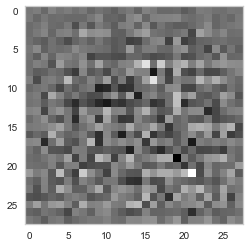

In [37]:
# Crear variable con modelo de generador de imagenes

# invocar modelo generador
generator = make_generator_model()

##################################################################################################################

# Crear vector aleatorio normal de dimension (1,100)(variable aleatoria gaussiana (media=0, var=1))
noise = tf.random.normal([1, 100])

# generar imagen 
generated_image = generator(noise, training=False)

# graficar imagen generada en escala de grises
plt.figure(figsize=(6,4))
plt.grid(False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.show()

# fin

### Modelo Discriminador - Crear & Definir

In [38]:
# Modelo CNN Discriminador de imagenes - (clasificador de imagenes) -  Imagenes de (28 x 28)

# Este es un clasificador de 02 estados (0 o 1) en la salida (1 salida)
# su finalidad es decidir si una imagen generada es indistinguible de una imagen humana, que no parezca del todo sintetica

# Clasificacion : 0-1 (Imagen Falsa - Imagen Real)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1)) # 01 salida de clasificacion

    return model

# fin

In [39]:
# Discriminar sobre Imagenes Generadas (Aun modelos sin entrenar)

# crear instancia de modelo discriminador de imagenes
discriminator = make_discriminator_model()

#######################################################################3

# evaluar la clasificacion de los modelos sin entrenar

decision = discriminator(generated_image)

# mostrar decision
print('\n\nClasificacion del Discriminador ante Generador:')
print (decision)

# fin



Clasificacion del Discriminador ante Generador:
tf.Tensor([[0.00021686]], shape=(1, 1), dtype=float32)


### Teoria - Conceptos de GAN 

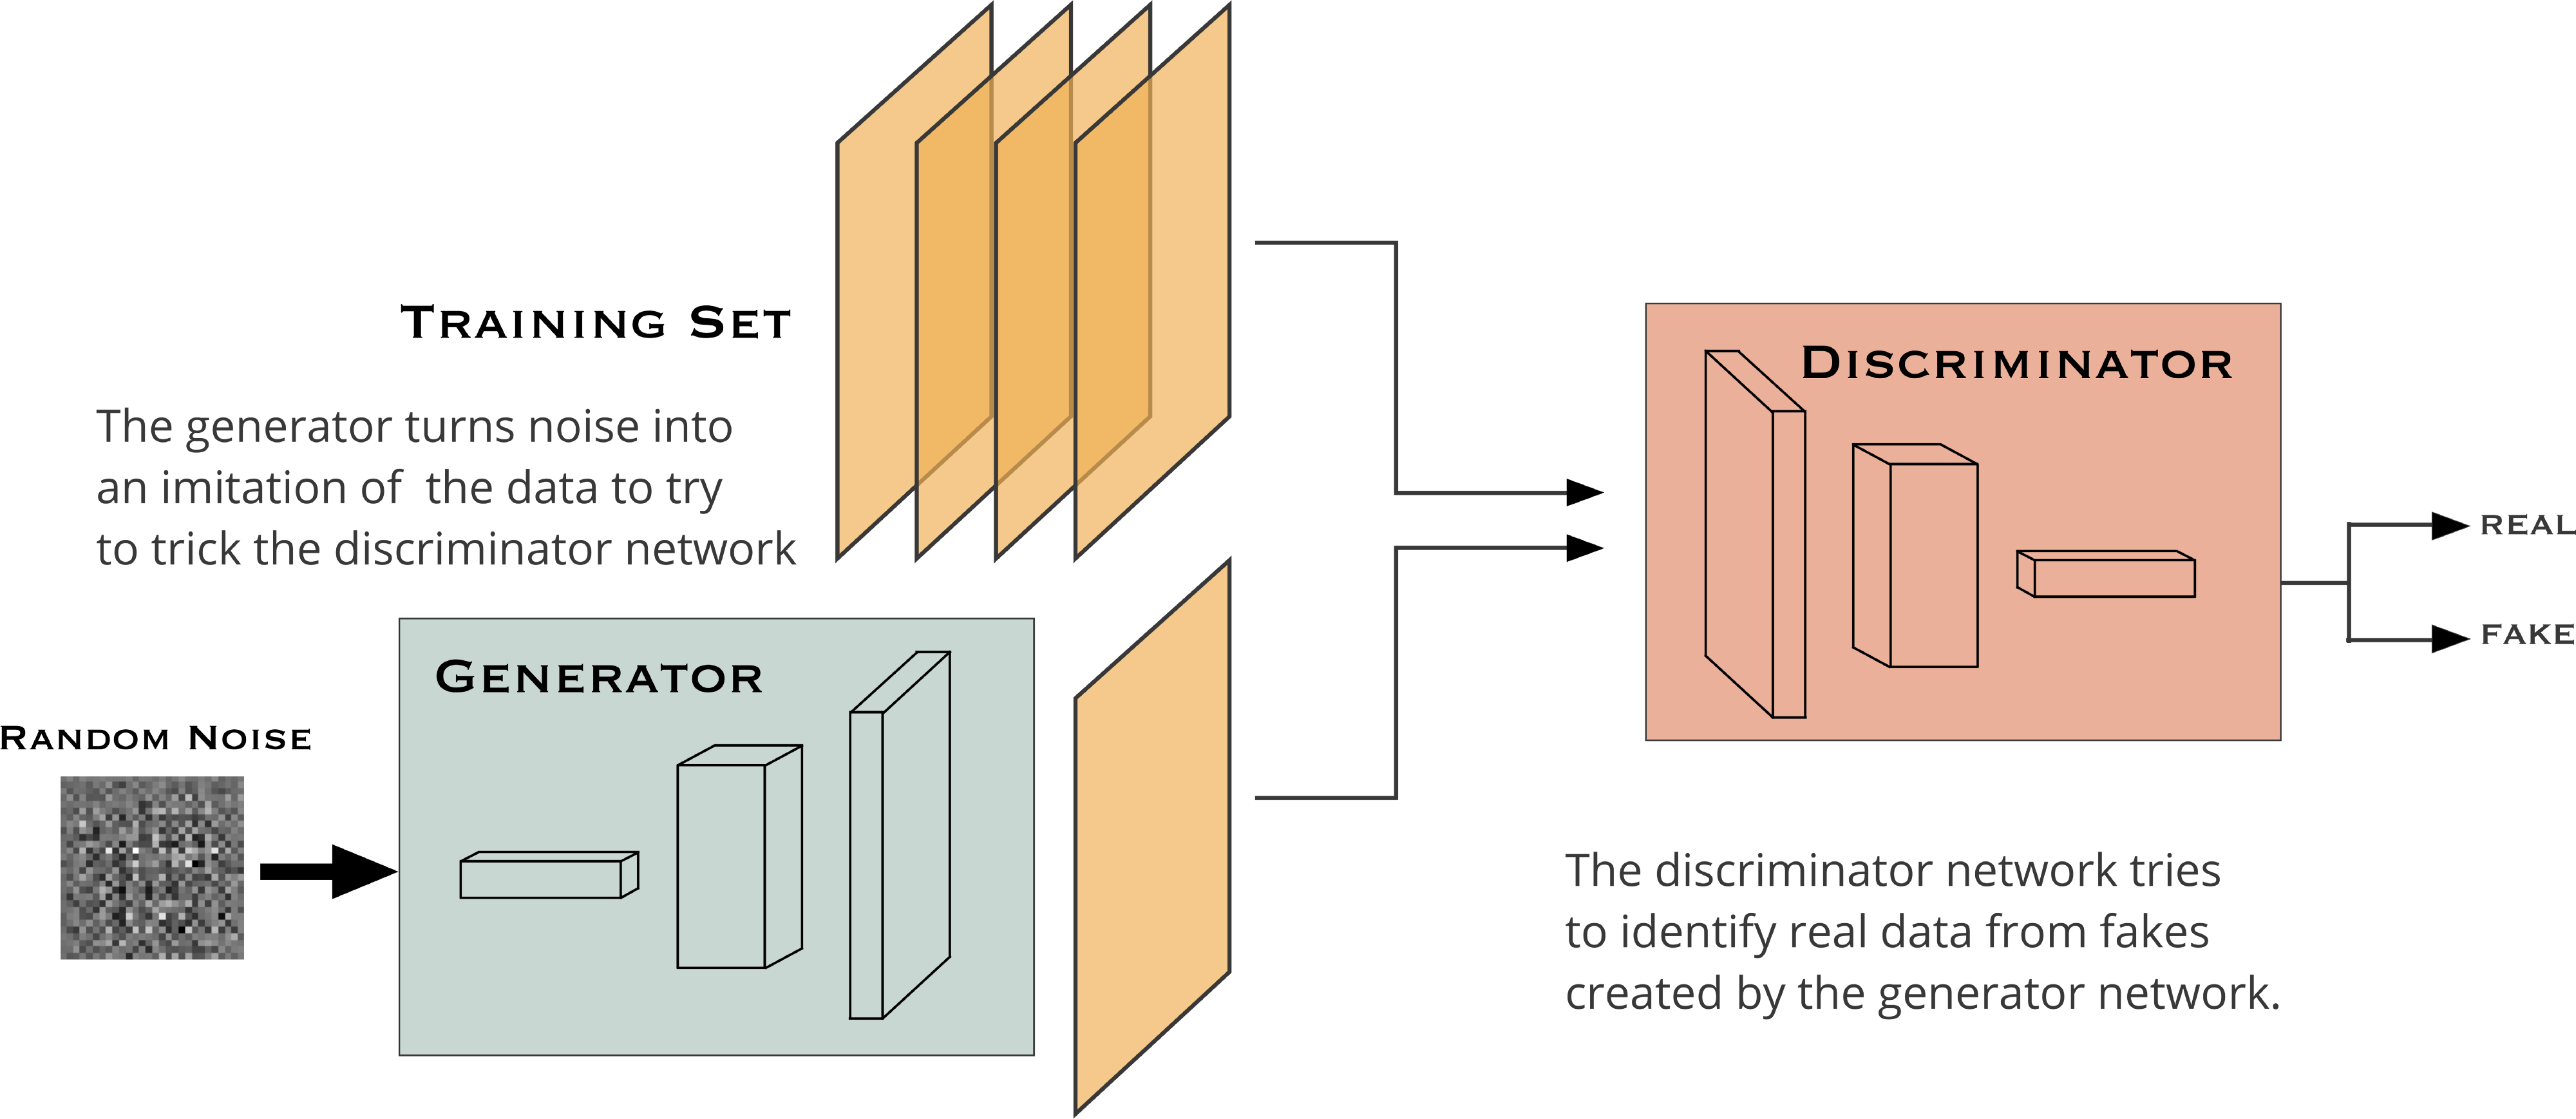

In [10]:
Image(filename = "imagen_gan3.png") # ¿Que es GAN? --- conceptos

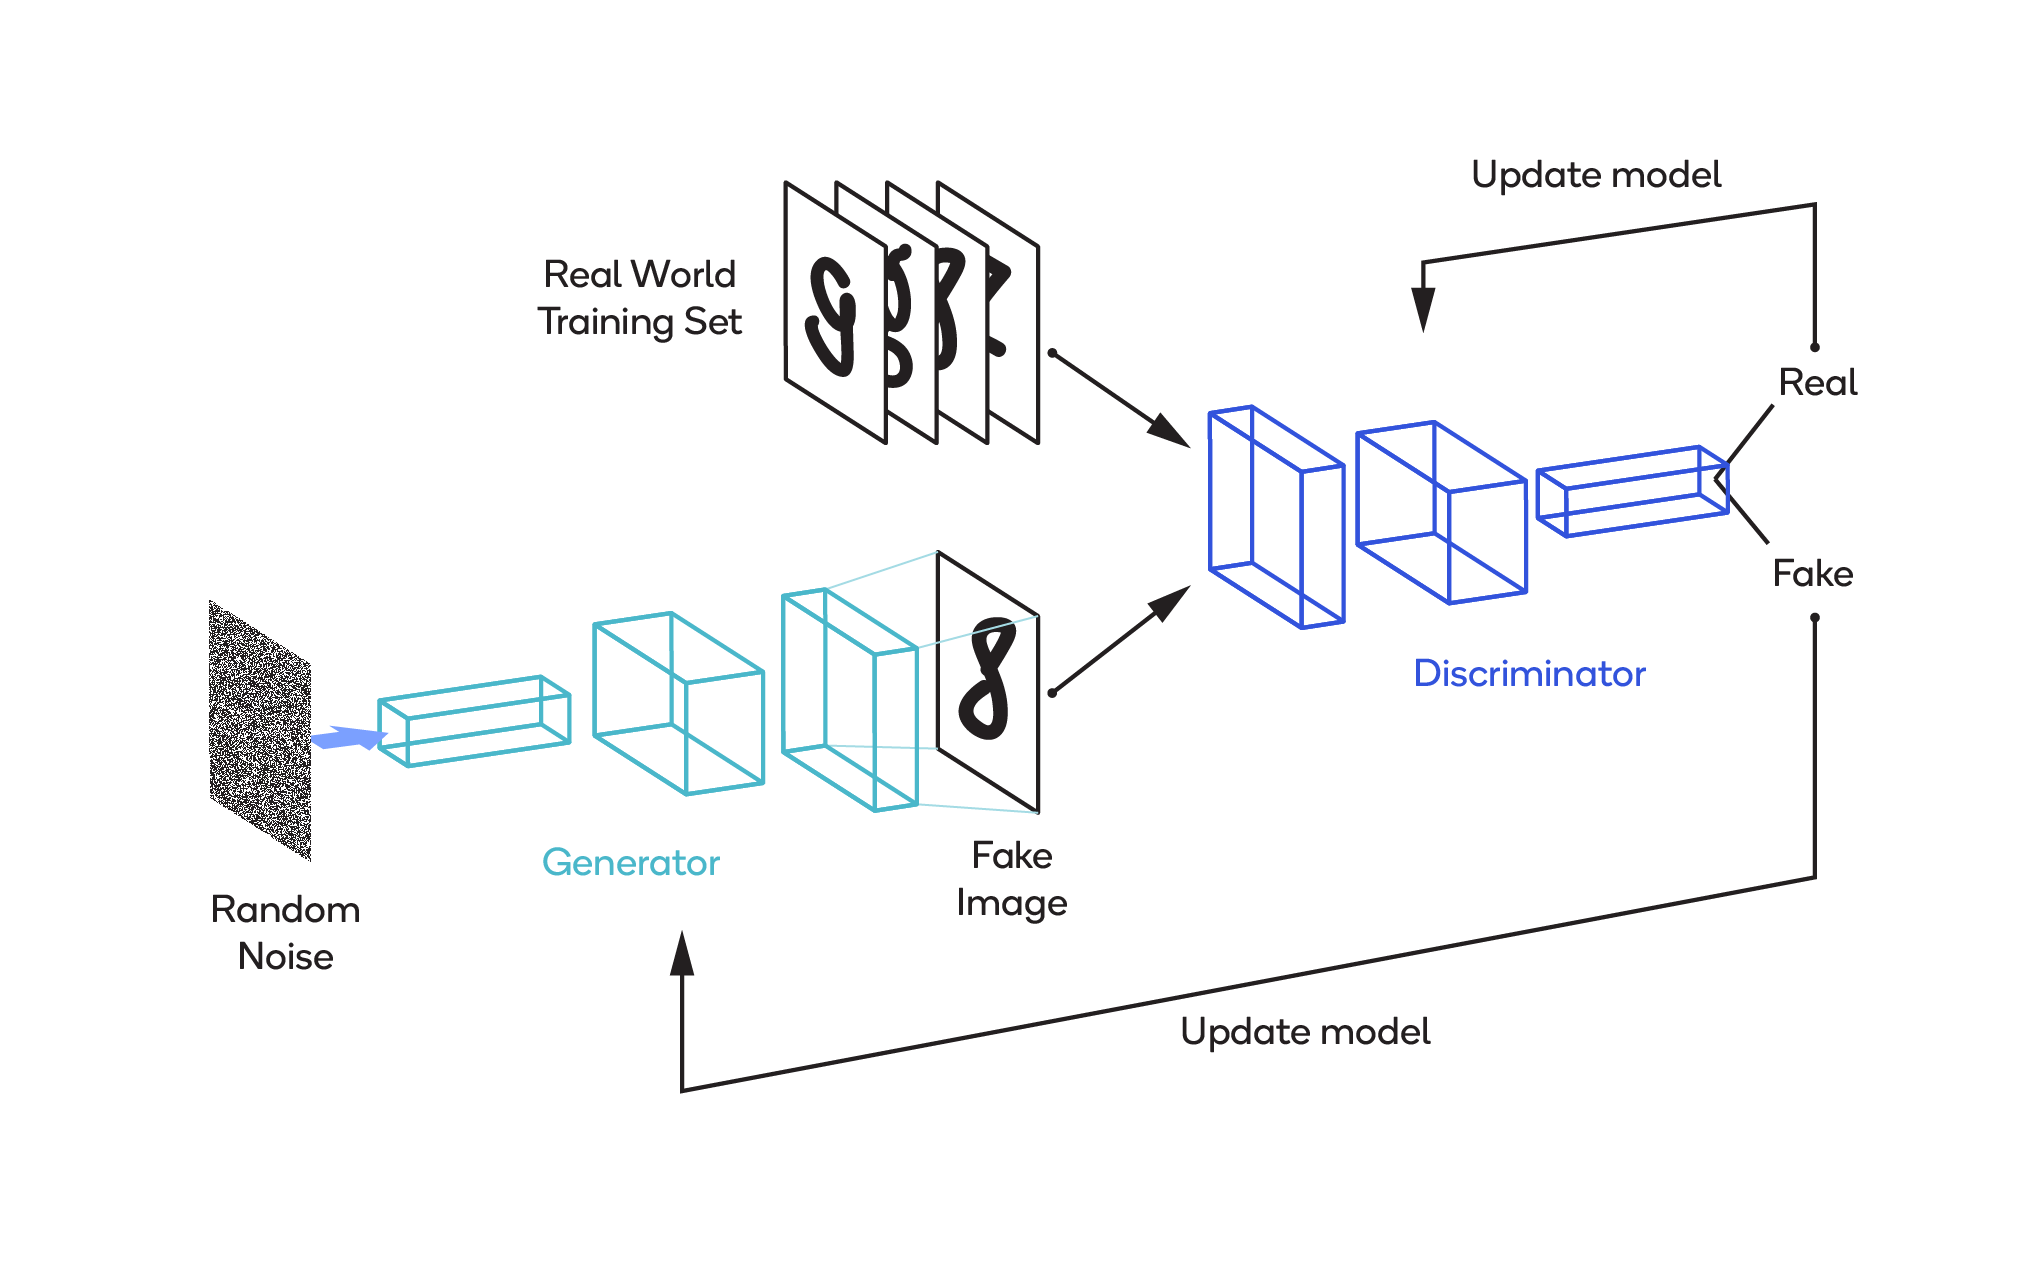

In [9]:
Image(filename = "imagen_gan4.png") # ¿Que es GAN? --- conceptos

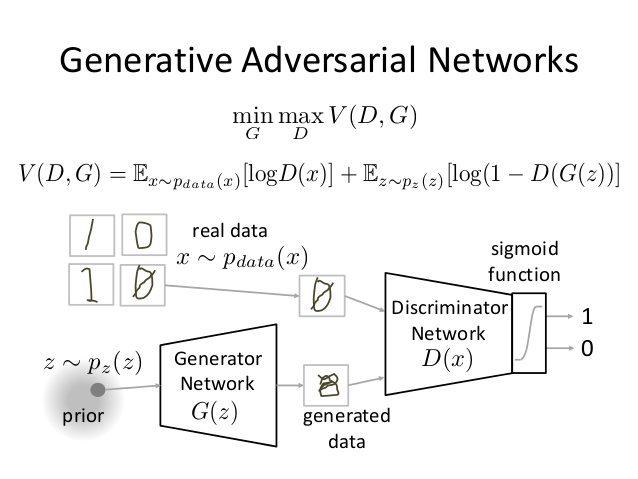

In [8]:
Image(filename = "imagen_gan.jpg") # ¿Que es GAN? --- conceptos

### Definicion de Calculo de Error (Loss) del Modelo

In [40]:
# Definicion de Pérdida o Error de los modelos 

# Funcion de pérdida para el Generador y Discriminador (valores entre [0,1])
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# IMPORTANTE: es preferible usar la ultima capa "sin sigmoid" y indicar from_logits=True
# debido a cuestiones de "inestabilidad numerica" que puede generar una capa final con sigmoid
# Si se tiene un valor de sigmoid menor a 1e-7 es posible que no se entrene adecuadamente

#################################################################################################

# Perdida en el Discriminador: se considera el error ante la imagen falsa + error ante imagen real
def discriminator_loss(real_output, fake_output):
    
    # El objetivo del Discriminador en la GAN es:
    # ** Ante entradas de imagen real debe predecir 1 (salida) .. es decir si predice 0, se equivocó el Discriminador
    # ** Ante entradas de imagen del generador debe predecir 0 (salida) .. es decir si predice 1, se equivocó el Discriminador
    
    ## error cometido por el discriminador ante una imagen real ... salida ante real debe ser 1
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    
    ## error cometido por el discriminador ante una imagen falsa ... salida ante falsa debe ser 0
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) 
    
    ## se suma el error cometido por el discriminador ante imagen real + ante imagen falsa
    total_loss = real_loss + fake_loss 
    return total_loss

##################################################################################################

# Perdida en el Generador

def generator_loss(fake_output):
    
    # El objetivo del Generador es llegar a engañar al Discriminador, esto lo logrará si hace:
    # ** La imagen generada (fake) debe intentar producir una salida del Discriminador igual a 1 (real)
    # es deicr, debe hacerle creer al Discriminador que se le dió una imagen real 
    
    # Este es el punto de quiebre, ya que el Discriminador tratará de catalogarlo como 0 a las imagenes del Generador
    # pero la idea del Generador es hacer que el Discriminador indique 1 de prediccion. 
    # Estos "Objetivos Contrarios" permite que se refuerzen entre durante el entrenamiento
    
    # Aqui como se dijo, el Generador ha generado una buena imagen si el Discriminador predice 1 a la salida (valor deseado)
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# fin

### Compilar y Definir Codigo para Entrenar el Modelo

In [41]:
# Compilar y definir Entrenamientos

# Optimizadores para el entrenamiento 
ratio_aprendizaje = 1e-4   
generator_optimizer = tf.keras.optimizers.Adam(ratio_aprendizaje)       # Generador Optimizer
discriminator_optimizer = tf.keras.optimizers.Adam(ratio_aprendizaje)   # Discriminador Optimizer

##################################################################################################

#############################################################################
#### Crear Checkpoint para guardar modelo durante entrenamiento #############

#checkpoint_dir = './checkpoint_entrenamiento'
#checkpoint_prefix = os.path.join(checkpoint_dir, "chkp")

# checkpoint_dir y checkpoint_prefix se indican en los parametros del programa
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

##################################################################################################

# Entrenamiento

########################################################
### Parametros para Modelo ---- IMPORTANTE !!!!!!! #####
########################################################

noise_dim = 100 # dimension de vector de entrada al Generador de imagenes

# cantidad de imagenes a generar durante entrenamiento para mostrar progresos ... solo es por referencia
num_examples_to_generate = 16 

# Generar semillas de datos para crear imagenes. Se crearán "num_examples_to_generate" como numero imagenes 
seed = tf.random.normal([num_examples_to_generate, noise_dim])

###################################################################################################

##### Recordar en bloques anteriores se colocó:
# BUFFER_SIZE = 60000  ## en este caso este valor equivale a train_images.shape[0]
# BATCH_SIZE = 256     ## tamaño de bloques 

# Se requiere colocar "tf.function" para que permita compilar al modelo ("compile")          
@tf.function
def train_step(images):
    
    # Se crean "BATCH_SIZE" cantidad de muestras o imagenes aleatorias con las cuales entrenar el modelo
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    # Calculo de Gradiente ... Entrenamiento de Modelos de ANN
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        
        # Prediccion del Discriminador con las imagenes generadas
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        # Calculo de valor de Pérdida/Error (Loss)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    
    # Generacion de Calculo de Gradientes ... recordar que aproxima: f'(x) = (f(x+h)-f(x))/h .. aproximacion por metodos numericos realiza este paso
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Optimizadores ... Esto hace el calculo de la optimizacion mediante la gradiente (Descenso de Gradiente).. optimiza los parametros de las ANN (pesos)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

###################################################################################################
        
def train(dataset, epochs,save_images):
    # calculo de tiempo total de entrenamiento (en segundos)
    tiempo_total = 0.0
    
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            # Recordar 
            train_step(image_batch)

        # Produce Imagenes para el GIF a medida que entrena
        # Se indica la cantidad de imagenes a mostrar como parte del entrenmaiento 
        display.clear_output(wait=True)
        generate_and_save_images(generator,epoch + 1,seed,save_images)

        # Guarda el modelo cada N epochs de entrenamiento.. Se guarda "Checkpoint"
        N = 5 # Cantidad de epochs para guardar mejor modelo ... es como un CallBack de checkpoint
        if (epoch + 1) % N == 0:
            checkpoint.save(file_prefix = checkpoint_prefix) # se usa modelo de checkpoint indicado
    
        # Informacion de tiempo de ejecucion de cada epoch
        print ('Tiempo epoch {} es {} sec'.format(epoch + 1, np.round(time.time()-start),4))
        
        # Guardar tiempo total de ejecucion actual (en segundos)
        tiempo_total += np.round(time.time()-start,0)
        print('Tiempo total entrenamiento: ',tiempo_total,' sec')
        print('Tiempo promedio por epoch: ',np.round(tiempo_total/(epoch+1),0),' sec')

    # Generar Imagenes luego del Epoch final ... al finalizar entrenamiento 
    display.clear_output(wait=True)
    generate_and_save_images(generator,epochs,seed,save_images)        

###################################################################################################

def generate_and_save_images(model, epoch, test_input, save_images):
    
    # Aqui se coloca "training" a False, es decir se detiene entrenamiento en este punto
    # Todas las capas se ejecutan en modo inferencia prediccion (batchnorm)
    
    predictions = model(test_input, training=False)

    # Se configuran los parametros de la grafica para ir mostrando durante entrenamiento
    fig = plt.figure(figsize=(12,12))
    
    # cantidad de imagenes a plotear solo como muestra de progreso de la GAN por epoch
    sub_imagenes = predictions.shape[0]
    
    for i in range(sub_imagenes):
        
        # Tener cuidado .... revisar la variable definida anterior "num_examples_to_generate"
        ancho = 4
        alto = 4
        plt.subplot(ancho,alto, i+1) ## solo aplica para 16 graficas en una matriz de 4*4 (subplots)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
        
        # Cortar bucle en caso se haya indicado mas imagenes que el aceptable por subplot(ancho,alto)
        if( i > ((ancho*alto)-1)):
            break 

    # Guardar resultados de la imagen obtenida del progreso realizado por el Generador y el Discriminador
    if(save_images):
        # guardar la imagen generada en un .png para luego poder crear GIF
        plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    
    # mostrar imagenes del Generador durante entrenamiento
    plt.show()

# fin

### Entrenar el modelo a los datos (Fitting)

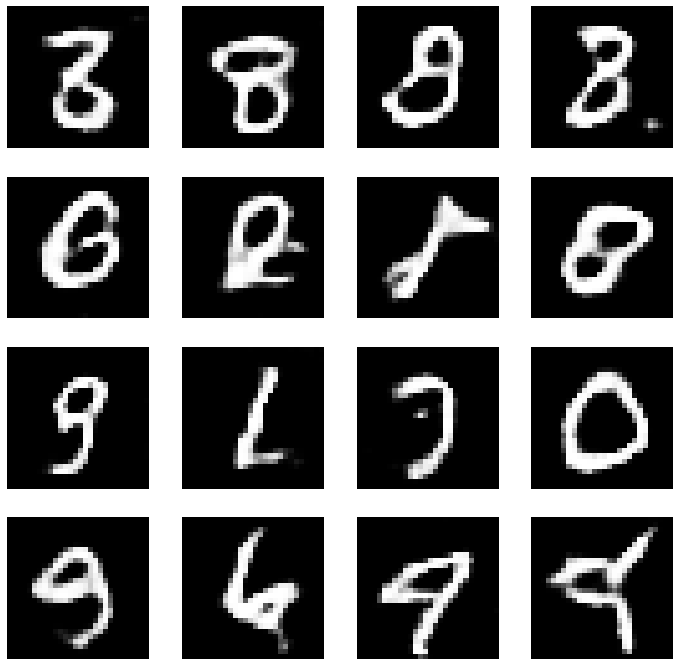

In [12]:
#  Entrenar Modelo --- Aqui se realiza el entrenamiento

# epochs de entrenamiento ... Cuidado que a gran cantidad de epochs mucho mayor tiempo de entrenamiento
EPOCHS = 100

# nota: save_images permite o no guardar imagenes para crear el GIF posterior.. si save_images = False no se podrá crear GIF
train(train_dataset, EPOCHS, save_images=False)

# Restaurar ultimo Checkpoint
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## No olvidarse poner

# fin 

### Restaurar Checkpoint de modelo guardado en entrenamiento

In [42]:
# Restaurar ultimo Checkpoint del entrenamiento

restaurar=0 # Se indica si restaurar ultimo checkpoint guardado o no

if(restaurar):
    checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
    print('Se restauró ultimo checkpoint')
else:
    print('\n\nNo se restauró el ultimo checkpoint\n\n')

# fin

Se restauró ultimo checkpoint


In [14]:
# Mostrar datos de entrenamiento

# Mostrar una imagen, indicante el numero de epoch
def display_image(epoch_no):
    return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

# mostrar una imagen en epoch especifico
try:
    display_image(EPOCHS)
except:
    print('\n\nEs posible que no se guardaran imagenes en "train" para crear GIF\n\n')
    
# fin



Es posible que no se guardaran imagenes en "train" para crear GIF




### Crear GIF de entrenamiento del modelo (requiere se haya activado save_images en Fitting)

In [15]:
# Crear un GIF con imagenes creadas por el Generador a lo largo de sus epochs de entrenamiento

# nombre archivo GIF a crear
anim_file = 'gan_modelo.gif'

try: 
    with imageio.get_writer(anim_file, mode='I') as writer:

        filenames = glob.glob('image*.png')
        filenames = sorted(filenames)

        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

        image = imageio.imread(filename)
        writer.append_data(image)

    # mostrar el GIF creado    
    embed.embed_file(anim_file) 
except:
    print('\n\nEs posible que no se guardaran imagenes en "train" para crear GIF\n')
    
# fin



Es posible que no se guardaran imagenes en "train" para crear GIF



--------------

## Rendimiento  de Generador Y Discriminador - Curva ROC 


Observacion a usar:  48000
Porcentaje equivalente:  80.0 %


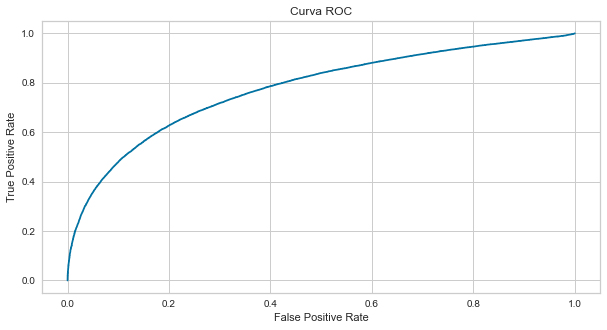



Resultados del Modelo Generador & Discriminador

Resultados Curva ROC
Valor AUC:  0.78
Valor AUC (2):  0.78
Valor umbral optimo:  0.0
Valor FPR optimo:  0.26
Valor TPR optimo:  0.69




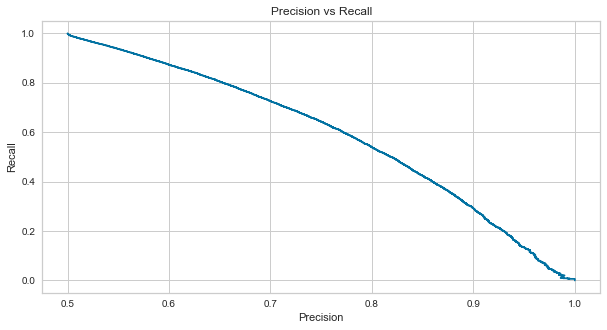

Resultados Curva Precision vs Recall
Valor F1 optimo:  0.72
Valor umbral optimo (F1):  -0.24
Valor precision optimo (F1):  0.64
Valor recall optimo (F1):  0.81


Resultados basados en Precision (P)
Valor precision optimo:  1.0
Valor F1 optimo (P):  0.01
Valor umbral optimo (P):  1.82
Valor recall optimo (P):  0.01



Reporte Umbral Optimo - ROC: 
              precision    recall  f1-score   support

        Fake       0.70      0.74      0.72     48000
        Real       0.72      0.69      0.71     48000

    accuracy                           0.71     96000
   macro avg       0.71      0.71      0.71     96000
weighted avg       0.71      0.71      0.71     96000


Resultados Umbral Optimo - Precision & Recall (F1)
              precision    recall  f1-score   support

        Fake       0.75      0.55      0.63     48000
        Real       0.64      0.81      0.72     48000

    accuracy                           0.68     96000
   macro avg       0.70      0.68      0.68     96000


In [16]:
# Rendimiento de clasificador "Discriminador" y "Generador"

# IMPORTANTE: En caso sea necesario modifique algunos parametros del bloque como "size_batch" o "porcentaje"

# Calculo de ROC y AUC

####################################################################
##################### INGRESAR MANUAL ##############################

porcentaje = 0.8 # decimal, entre  0 y 1
cantidad = int(porcentaje*train_images.shape[0]) # entero

print('\nObservacion a usar: ',cantidad)
print('Porcentaje equivalente: ',np.round(porcentaje*100.0,2),'%')

# cantidad = 3000 ## colocar manualmente el valor de la cantidad de observacion a usar

####################################################################
########## Aplicar Generador (imagenes falsas) #####################

cantidad_fake = cantidad

# Definir parametros de calculo de datos en bloques (por lotes o batch)
size_batch = 1000 # maximo leer esto por bucle
datos_batch = 0 # contador de datos generados .. para terminar el bucle
y_fake = np.zeros(cantidad_fake) # inicializar vector con predicciones

while(datos_batch < cantidad_fake):
    
    cantidad_leer = size_batch if (cantidad_fake - datos_batch) >= size_batch else (cantidad_fake - datos_batch)  #
    
    # Crear vector aleatorio normal de dimension (1,100)(variable aleatoria gaussiana (media=0, var=1))
    noise = tf.random.normal([cantidad_leer, 100])

    # generar imagen con "Generador"
    generated_image = generator(noise, training=False)

    # Discriminar sobre imagenes generada con el Generador

    # evaluar la clasificacion de los modelos sin entrenar
    y_fake_auxi = discriminator(generated_image)
    y_fake_auxi = y_fake_auxi.numpy().reshape(cantidad_leer)
    
    y_fake[datos_batch : datos_batch + cantidad_leer] = y_fake_auxi
    datos_batch += cantidad_leer
    
    del y_fake_auxi,generated_image,noise # borrar memoria
    
############################################################################################

###############################################################
######### Aplicar Imagenes Reales (imagenes reales) ###########

cantidad_real = cantidad

# Definir parametros de calculo de datos en bloques (por lotes o batch)
size_batch2 = 1000 # maximo leer esto por bucle
datos_batch2 = 0 # contador de datos generados .. para terminar el bucle
y_real = np.zeros(cantidad_real) # inicializar vector con predicciones

# Seleccion de datos aleatorios del dataset de imagenes reales
valores = np.random.randint(0,train_images.shape[0],cantidad_real)

while(datos_batch2 < cantidad_real):
    
    cantidad_leer = size_batch2 if (cantidad_real - datos_batch2) >= size_batch2 else (cantidad_real - datos_batch2)  #
    
    # Seleccion de muestras
    valor = valores[datos_batch2 : datos_batch2 + cantidad_leer]
    ## valor = np.random.randint(0,train_images.shape[0],cantidad_leer)
    valor = tf.convert_to_tensor(valor)
    #imagen = train_images[valor]
    imagen = tf.gather(train_images, valor)

    # Discriminador entrenado
    #decision = discriminator(imagen[np.newaxis])
    y_real_auxi = discriminator(imagen)
    y_real_auxi = y_real_auxi.numpy().reshape(cantidad_leer)
    
    y_real[datos_batch2 : datos_batch2 + cantidad_leer] = y_real_auxi
    datos_batch2 += cantidad_leer
    
    del y_real_auxi,imagen # borrar memoria

###############################################################################################

len_real = len(y_real)  # valores del discriminador de imagenes reales
len_fake = len(y_fake)  # valores del discriminador de imagenes fake o creadas por el Generador

y_pred = np.zeros(len_real+len_fake)
y_target = np.zeros(len_real+len_fake)

y_target[:len_fake] = 0 # colocar valor de fake (0) # No es necesario esto ...ya se seteó a 0 antes
y_target[len_fake:]= 1  # colocar valor de real (1)

y_pred[:len_fake] = y_fake # prediccion de falsos (0)
y_pred[len_fake:] = y_real # prediccion de reales (1)

# Calcular valor de activacion mediante sigmoide [0,1]
# y_pred = 1/(1 + np.exp(-y_pred))

######################################################################
################ Calculo de curvas de ROC y valor AUC ################

fpr, tpr, thresh = skl.metrics.roc_curve(y_target, y_pred, pos_label=1)    
auc_valor = skl.metrics.auc(fpr, tpr) 
auc_otro = skl.metrics.roc_auc_score(y_target, y_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr)
plt.title('Curva ROC')
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Distancia minima --- mejor umbral "thresh"
distancias = [(((i)**2) + ((1-j)**2)) for i,j in zip(fpr,tpr)]
argumento = np.argmin(distancias)
umbral = thresh[argumento]
fpr_umbral = fpr[argumento] 
tpr_umbral = tpr[argumento]

print('\n\nResultados del Modelo Generador & Discriminador\n')
print('Resultados Curva ROC')
print('Valor AUC: ',np.round(auc_valor,2))
print('Valor AUC (2): ',np.round(auc_otro,2))
print('Valor umbral optimo: ',np.round(umbral,2))
print('Valor FPR optimo: ',np.round(fpr_umbral,2))
print('Valor TPR optimo: ',np.round(tpr_umbral,2))
print('\n')

##############################################################################
################ Calculo de curvas de Precison _ Recall Curve ################

preci, recall, thresho = skl.metrics.precision_recall_curve(y_target, y_pred, pos_label=1)    

# Remover ultimo elemento de vectores... sklearn lo agrega con otros fines
preci = preci[:-1]
recall = recall[:-1]

# Calculo de F1
f1_score = (2*preci*recall)/(preci + recall + 1e-10) 

plt.figure(figsize=(10,5))
plt.plot(preci,recall)
plt.title('Precision vs Recall')
plt.grid(True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

# Distancia minima --- mejor umbral "thresho"

# Mejores valores con respecto a F1-score
argumento_f1 = np.argmax(f1_score) 
f1_mejor = f1_score[argumento_f1]
umbral_f1 = thresho[argumento_f1]
preci_umbral = preci[argumento_f1] 
recall_umbral = recall[argumento_f1]

print('Resultados Curva Precision vs Recall')
print('Valor F1 optimo: ',np.round(f1_mejor,2))
print('Valor umbral optimo (F1): ',np.round(umbral_f1,2))
print('Valor precision optimo (F1): ',np.round(preci_umbral,2))
print('Valor recall optimo (F1): ',np.round(recall_umbral,2))
print('\n')


# Mejores valores con respecto a Precision (P)
argumento_p = np.argmax(preci) 
f1_mejor_p = f1_score[argumento_p]
umbral_p = thresho[argumento_p]
preci_umbral_p = preci[argumento_p] 
recall_umbral_p = recall[argumento_p]

print('Resultados basados en Precision (P)')
print('Valor precision optimo: ',np.round(preci_umbral_p,2))
print('Valor umbral optimo (P): ',np.round(umbral_p,2))
print('Valor F1 optimo (P): ',np.round(f1_mejor_p,2))
print('Valor recall optimo (P): ',np.round(recall_umbral_p,2))
print('\n')


# Distancia minima --- mejor umbral "thresh"
distancias_pr = [(((1-i)**2) + ((1-j)**2)) for i,j in zip(preci,recall)]
argumento_pr = np.argmin(distancias_pr) 
f1_mejor_pr = f1_score[argumento_pr]
umbral_pr = thresho[argumento_pr]
preci_umbral_pr = preci[argumento_pr] 
recall_umbral_pr = recall[argumento_pr]

print('Resultados basados en Minimizar Precision vs Recall')
print('Valor umbral optimo (PR): ',np.round(umbral_pr,2))
print('Valor F1 optimo (PR): ',np.round(f1_mejor_pr,2))
print('Valor precision optimo: ',np.round(preci_umbral_pr,2))
print('Valor recall optimo (PR): ',np.round(recall_umbral_pr,2))
print('\n')


#################################################################################
###### Resultados : ROC vs Precision & Recall Thresholds vs Precision ###########

# Utilizar umbral para generar clasificacion 0 o 1
y_pred_roc = 1*(y_pred > umbral)   # ROC  
y_pred_f1 = 1*(y_pred > umbral_f1) # F1-score
y_pred_p = 1*(y_pred > umbral_p)   # Precision (P)
y_pred_pr = 1*(y_pred > umbral_pr) # Minimizar Precision vs Recall

names = ['Fake', 'Real'] # clases objetivo a indicar al reporte

print('\nReporte Umbral Optimo - ROC: ')
print(skl.metrics.classification_report(y_target, y_pred_roc, target_names = names))

print('\nResultados Umbral Optimo - Precision & Recall (F1)')
print(skl.metrics.classification_report(y_target, y_pred_f1, target_names = names))

print('\nResultados Umbral Optimo - Precision (P)')
print(skl.metrics.classification_report(y_target, y_pred_p, target_names = names))

print('\nResultados Umbral Optimo - Min Precision & Recall(PR)')
print(skl.metrics.classification_report(y_target, y_pred_pr, target_names = names))
print('\n')

# Guardar umbrales estimados
%store umbral
%store umbral_f1
%store umbral_p
%store umbral_pr

print('\n')

# fin

--------------------

--------------

## Rendimiento de Modelo Generador + Discriminador ante imagenes Falsas

In [50]:
# Inicializar variables de experimento o medicion del modelo

# NOTA: estas variables se aplicarán en el siguiente bloque de codigo

aciertos_d = 0 ## contará cuantas veces acierta
total_d = 0 ## contará cuantas veces en total 
precision_d= None # precision global

umbral_elegido = None # umbral para el Discriminador

# Leer umbrales estimados en bloque anterior de curvas ROC/P&R/P
try:
    %store -r umbral     
    %store -r umbral_f1  
    %store -r umbral_p
    %store -r umbral_pr
    
    # Elegir cual de los umbrales seleccionar para siguiente bloque de codigo
    umbral_elegido = umbral # se indica cual de los umbrales usar

except:
    umbral_elegido = 0.5 # se asigna manualmente un umbral para la toma de decision
    print('No se encontró registrado umbrales optimos para el Discriminador')

# fin



Generador
Imagen generada:


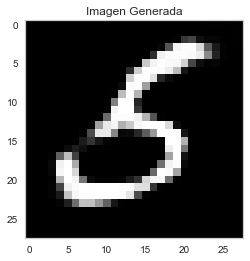



Discriminador
Real : 1 , Fake: 0
-------------------------------
Prediccion :  0.05
Clase Predicción:  1
-------------------------------
Aciertos:  63.64 %
Total ejemplos:  44




In [94]:
# Aplicar Generador y Discriminador Entrenado

# Crear vector aleatorio normal de dimension (1,100)(variable aleatoria gaussiana (media=0, var=1))
noise = tf.random.normal([1, 100])

# generar imagen con "Generador"
generated_image = generator(noise, training=False)

# graficar imagen generada en escala de grises
print('\n\nGenerador')
print('Imagen generada:')
plt.figure(figsize=(6,4))
plt.grid(False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.title('Imagen Generada')
plt.show()

#########################################################################################################################

# Discriminar sobre imagenes generada con el Generador

# evaluar la clasificacion de los modelos sin entrenar
decision = discriminator(generated_image)
valor = decision.numpy().tolist()[0][0]
valor_clase = 0 if valor < umbral_elegido else 1     # recordar: 1 es real, 0 es falsa

# Medidas de precision
total_d += 1 ## se aumenta en 01 el total de experimentos de testeo 
aciertos_d += (1-valor_clase) # en caso detecte real se aumenta

# Medida de precision
precision_d = round(100.0*aciertos_d/total_d,2)

##########################################################################################

# mostrar decision
print('\n\nDiscriminador')
print('Real : 1 , Fake: 0')
print('-------------------------------')
print('Prediccion : ',np.round(valor,2))
print('Clase Predicción: ',valor_clase)
print('-------------------------------')
print('Aciertos: ',precision_d,'%')
print('Total ejemplos: ',total_d)
print('\n')

# Comentario: Se espera que a la larga se convergan a los valores calculados en el entrenamiento
# esto gracias a la Teorema del Limite Central ... convergencia al esperado en el infinito


# fin

---------------

## Rendimiento de Modelo Discriminador ante imagenes Reales

In [95]:
# Inicializar variables de experimento o medicion del modelo

# NOTA: estas variables se aplicarán en el siguiente bloque de codigo

aciertos = 0 ## contará cuantas veces acierta
total = 0 ## contará cuantas veces en total 
precision = None # precision global

umbral_elegido = None # umbral para el Discriminador

# Leer umbrales estimados en bloque anterior de curvas ROC/P&R/P
try:
    %store -r umbral  
    %store -r umbral_f1 
    %store -r umbral_p
    %store -r umbral_pr
    
    # Elegir cual de los umbrales seleccionar para siguiente bloque de codigo
    umbral_elegido = umbral # se indica cual de los umbrales usar

except:
    umbral_elegido = 0.5 # se asigna manualmente un umbral para la toma de decision
    print('No se encontró registrado umbrales optimos para el Discriminador')

# fin



Imagen real aleatoria:  43996


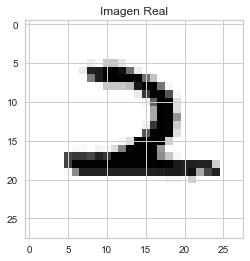



Discriminador
Real : 1 , Fake: 0
-------------------------------
Exacto Predicción:  1.31
Clase Predicción:  1
-------------------------------
Aciertos:  88.89 %
Total ejemplos:  44





In [113]:
# Seleccion de una imagen aleatoria de testeo --- Rendimiento del Discriminador ante imagenes reales

valor = np.random.randint(0,train_images.shape[0],1)
print('\n\nImagen real aleatoria: ',valor[0])
imagen = train_images[valor][0]
plt.imshow((imagen*127.5) + 127.5)
plt.title('Imagen Real')
plt.show() # mostrar

##########################################################################################

# Discriminador entrenado
decision = discriminator(imagen[np.newaxis])
valor = decision.numpy().tolist()[0][0]
valor_clase = 0 if valor <  umbral_elegido  else 1     # recordar: 1 es real, 0 es falsa

# Medidas de precision
total += 1 ## se aumenta en 01 el total de experimentos de testeo 
aciertos += valor_clase # en caso detecte real se aumenta

# Medida de precision
precision = round(100.0*aciertos/total,2)

##########################################################################################

print('\n\nDiscriminador')
print('Real : 1 , Fake: 0')
print('-------------------------------')
print('Exacto Predicción: ',np.round(valor,2))
print('Clase Predicción: ',valor_clase)
print('-------------------------------')
print('Aciertos: ',precision,'%')
print('Total ejemplos: ',total_d)
print('\n\n')

# Comentario: Se espera que a la larga se convergan a los valores calculados en el entrenamiento
# esto gracias a la Teorema del Limite Central ... convergencia al esperado en el infinito

# fin

-------------------

## Rendimiento Total de Modelos Discriminador ante imagenes Reales y Sinteticas

In [114]:
# Inicializar variables de experimento o medicion del modelo

# NOTA: estas variables se aplicarán en el siguiente bloque de codigo

aciertos_c = 0 ## contará cuantas veces acierta
aciertos_2c = list(np.zeros(2)) # lista con 2 salidas

total_c = 0 ## contará cuantas veces en total 
total_2c = list((np.zeros(2))) # lista con 2 salidas para contar total por cada salida

precision_c = None # precision global
precision_2c = None # precision por cada salida

umbral_elegido = None # umbral para el Discriminador

# Leer umbrales estimados en bloque anterior de curvas ROC/P&R/P
try:
    %store -r umbral  
    %store -r umbral_f1 
    %store -r umbral_p 
    %store -r umbral_pr
    
    # Elegir cual de los umbrales seleccionar para siguiente bloque de codigo
    umbral_elegido = umbral # se indica cual de los umbrales usar

except:
    umbral_elegido = 0.5 # se asigna manualmente un umbral para la toma de decision
    print('No se encontró registrado umbrales optimos para el Discriminador')

## Observacion:
# Tanto precision_2c, total_2c, aciertos_2c son: [Fake , Real]

# fin



Imagen real aleatoria:  1726


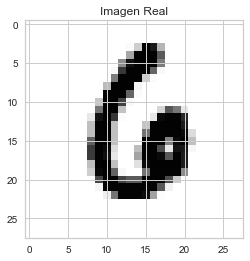



Resultados de Generados y Discriminador
-------------------------------
Precision global:  75.71 %
Total resultados:  70
-------------------------------
Resultados    :  Fake - Real
Aciertos      :  [26.0, 27.0]
Totales       :  [34.0, 36.0]
Precision (%) :  [76.47, 75.0]





In [184]:
# Experimentar con los resultados del modelo Generador y Discriminador

# Comentario: Se espera que a la larga se convergan a los valores calculados en el entrenamiento
# esto gracias a la Teorema del Limite Central ... convergencia al esperado en el infinito

######################################################################################################

elegir = np.random.random(1) # escoger un numero aleatorio entre [0,1]
elegir = 1 if elegir >= 0.5 else 0 # colocar a 0 o 1 el valor "elegir" .. Equiprobabilidad entre elegir 0 o 1 ...

if(elegir < 1): 

    # Aplicar Generador --- Se genera imagen Fake (0 deberia ser etiquetado)

    # Crear vector aleatorio normal de dimension (1,100)(variable aleatoria gaussiana (media=0, var=1))
    noise = tf.random.normal([1, 100])

    # generar imagen con "Generador"
    generated_image = generator(noise, training=False)

    # graficar imagen generada en escala de grises
    print('\n\nGenerador')
    print('Imagen generada:')
    plt.figure(figsize=(6,4))
    plt.grid(False)
    plt.imshow(generated_image[0, :, :, 0], cmap='gray')
    plt.title('Imagen Generada')
    plt.show()

    #########################################################################################################################

    # Discriminar sobre imagenes generada con el Generador

    # evaluar la clasificacion de los modelos sin entrenar
    decision = discriminator(generated_image)
    valor = decision.numpy().tolist()[0][0]
    valor_clase = 0 if valor < umbral_elegido else 1     # recordar: 1 es real, 0 es falsa

    # Medidas de precision
    total_c += 1 ## se aumenta en 01 el total de experimentos de testeo
    total_2c[elegir] += 1 # se aumenta en 01 el total de imagenes fake
    
    aciertos_c += (1-valor_clase) # se aumenta en 01 unidad en caso se logre exito
    aciertos_2c[elegir] += (1-valor_clase) # se aumenta en 01 unidad en caso se logre exito
    
    # Medida de precision
    precision_c = round(100.0*aciertos_c/total_c,2)
    precision_2c = [round(100.0*i/(j+1e-10),2) for i, j in zip(aciertos_2c,total_2c)] 

###################################################################################################
    
else:    
    # Aplicar Imagen Real --- Se genera usa imagen real (1 deberia ser etiquetado)
    
    valor = np.random.randint(0,train_images.shape[0],1)
    print('\n\nImagen real aleatoria: ',valor[0])
    imagen = train_images[valor][0]
    plt.imshow((imagen*127.5) + 127.5)
    plt.title('Imagen Real')
    plt.show() # mostrar

    ##########################################################################################

    # Discriminador entrenado
    decision = discriminator(imagen[np.newaxis])
    valor = decision.numpy().tolist()[0][0]
    valor_clase = 0 if valor < umbral_elegido else 1     # recordar: 1 es real, 0 es falsa

    # Medidas de precision
    total_c += 1 ## se aumenta en 01 el total de experimentos de testeo
    total_2c[elegir] += 1 # se aumenta en 01 el total de imagenes fake
    
    aciertos_c += valor_clase # se aumenta en 01 unidad en caso se logre exito
    aciertos_2c[elegir] += valor_clase # se aumenta en 01 unidad en caso se logre exito
    
    # Medida de precision
    precision_c = round(100.0*aciertos_c/total_c,2)
    precision_2c = [round(100.0*i/(j+1e-10),2) for i, j in zip(aciertos_2c,total_2c)] 

# Resultaoos Obtenidos
print('\n\nResultados de Generados y Discriminador')
print('-------------------------------')
print('Precision global: ',precision_c,'%')
print('Total resultados: ',total_c)
print('-------------------------------')
print('Resultados    :  Fake - Real')
print('Aciertos      : ',aciertos_2c)
print('Totales       : ',total_2c)
print('Precision (%) : ',precision_2c)
print('\n\n')
    
# fin

-----------

-----------